In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
plt.rcParams["font.family"] = 'Malgun Gothic'
mpl.rc('axes', unicode_minus = True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from pandas import Series, DataFrame
import datetime as dt

In [353]:
df = pd.read_csv('clustering_data.csv', encoding = 'euc-kr',index_col = 0)
#df.to_csv('clustering_data.csv',encoding = 'euc-kr')


In [354]:
df

,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster,k_silhouette_coeff,사용시작시간대,사용시작날짜
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2016123100078,모닝,20호8555,서울번동3,2016.10,GRDA05,jjy2837,48,남,2013-11-25 00:00,2016-12-31 15:24:00,2017-01-01 01:00:00,2017-01-01 21:00:00,2017,1,1,53,1,17/01/01,1,01:00,1200.0,20.000000,종료,2017-01-01 00:59:00,2017-01-01 20:33:00,1.0,9.600000,19.566667,47760,383,105210,47760,0.0,0.0,57450.0,0.0,사용안함,3213730.0,2016-02-07 11:00:00,2018-01-13 09:00:00,서울특별시 강북구 번3동 주공아파트 206동 704호,2017-01-01 00:59:00.000000,6.865824,-0.340597,-0.316788,3,0.331008,0,2017-01-01
3,2017010100002,K3,10호7524,인천소래3,2015.08,GRDA06,youmi0217,28,여,2014-03-19 00:00,2017-01-01 00:57:00,2017-01-01 01:00:00,2017-01-01 03:30:00,2017,1,1,53,1,17/01/01,1,01:00,150.0,2.500000,종료,2017-01-01 01:02:00,2017-01-01 03:30:00,1.0,0.050000,2.466667,17130,54,25770,13200,3930.0,0.0,8640.0,0.0,사용안함,4419890.0,2016-02-17 18:00:00,2018-01-07 18:40:00,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호,2017-01-01 01:02:00.000000,0.280375,0.439938,-0.548629,1,0.674789,1,2017-01-01
4,2017010100004,모닝,36하1412,평택반지1,2016.12,GRDA02,yunseo1115,33,여,2016-12-20 18:35,2017-01-01 01:38:00,2017-01-01 01:50:00,2017-01-01 04:20:00,2017,1,1,53,1,17/01/01,1,01:50,150.0,2.500000,종료,2017-01-01 01:45:00,2017-01-01 04:13:00,1.0,0.200000,2.466667,12300,59,21150,12300,0.0,0.0,8850.0,0.0,사용안함,242480.0,2017-01-01 01:50:00,2017-02-04 14:30:00,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605",2017-01-01 01:45:00.000000,0.737699,-0.175668,-0.515625,1,0.635128,1,2017-01-01
5,2016123100108,모닝,29호3879,남양주별사랑2-2,2016.10,GRDA02,campos2,33,여,2016-10-05 19:51,2016-12-31 19:11:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017,1,1,53,1,17/01/01,2,02:00,60.0,1.000000,종료,2017-01-01 02:00:00,2017-01-01 03:00:00,1.0,6.816667,1.000000,0,0,0,0,0.0,0.0,0.0,0.0,사용안함,114310.0,2016-10-12 20:00:00,2017-02-27 12:50:00,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호",2017-01-01 02:00:00.000000,-0.423065,-0.787428,-0.002313,1,0.803385,2,2017-01-01
7,2017010100010,모닝,24호5482,부천범박1,2016.10,GRDA02,h2oks,38,남,2015-12-14 00:00,2017-01-01 04:28:00,2017-01-01 04:40:00,2017-01-01 06:40:00,2017,1,1,53,1,17/01/01,4,04:40,120.0,2.000000,종료,2017-01-01 04:35:00,2017-01-01 06:40:00,1.0,0.200000,2.083333,9840,51,17490,9840,0.0,0.0,7650.0,0.0,사용안함,444220.0,2016-01-15 11:30:00,2017-11-02 15:10:00,경기도 부천시 소사구 괴안동 범박휴먼시아1단지아파트 113동801호,2017-01-01 04:34:59.999999,0.593228,-0.308438,-0.479163,1,0.684782,4,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81211,2018010800157,모닝,10호7872,김포초당1,2016.10,GRDA05,jongmi1121,30,여,2016-10-27 10:45,2018-01-08 16:27:00,2018-01-08 18:20:00,2018-01-08 19:20:00,2018,1,8,2,2,18/01/08,18,18:20,60.0,1.000000,종료,2018-01-08 18:25:00,2018-01-08 18:54:00,2.0,1.883333,0.483333,3540,4,4180,3540,0.0,0.0,640.0,0.0,사용안함,2033470.0,2016-12-24 20:30:00,2018-01-08 18:20:00,"경기도 김포시 김포한강2로 144 (장기동, 초당마을주공아파트) 105-1104호",2018-01-08 18:25:00.000000,-0.222453,-0.533453,-0.205355,1,0.850169,18,2018-01-08
81213,2018010800176,모닝,36호6242,시흥능곡9,2016.06,GRDA03,rla098,45,남,2013-12-24 00:00,2018-01-08 18:25:00,2018-01-08 19:00:00,2018-01-08 21:00:00,2018,1,8,2,2,18/01/08,19,19:00,120.0,2.000000,종료,2018-01-08 19:00:00,2018-01-08 20:40:00,2.0,0.583333,1.666667,6370,18,9250,6370,0.0,0.0,2880.0,0.0,사용안함,356400.0,2016-06-03 21:30:00,2018-01-08 19:00:00,경기도 시흥시 능곡동 907동604호,2018-01-08 19:00:00.000000,-0.082025,-0.405260,-0.150109,1,0.846231,19,2018-01-08
81215,2018010800182,모닝,40허4866,평택소사벌2,2016.10,GRDA05,hyeon1103,38,여,2017-10-27 18:51,2018-01-08 19:05:00,2018-01-08 19:10:00,2018-01-08 21:00:00,2018,1,8,2,2,18/01/08,19,19:10,110.0,1.833333,종료,2018-01-08 19:05:0

In [358]:
df['k_means_cluster'].value_counts()

1    54255
4     8594
3     4541
2      350
0      189
Name: k_means_cluster, dtype: int64

([<matplotlib.patches.Wedge at 0x1ce089f56d0>,
 [Text(-0.8872739036132842, 0.6501884495796928, '1'),
  Text(0.7115444738327041, -0.8388709446381729, '4'),
  Text(1.0630661446992462, -0.282648849271108, '3'),
  Text(1.0993765898066206, -0.03702855364668471, '2'),
  Text(1.0999579783180018, -0.00961488089237024, '0')],
 [Text(-0.483967583789064, 0.354648245225287, '79.9'),
  Text(0.3881151675451113, -0.4575659698026397, '12.7'),
  Text(0.5798542607450433, -0.15417209960242254, '6.7'),
  Text(0.5996599580763384, -0.020197392898191658, '0.5'),
  Text(0.5999770790825464, -0.005244480486747403, '0.3')])

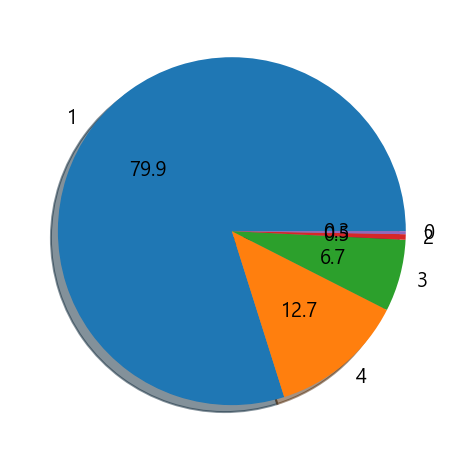

In [357]:
plt.pie(value, labels = labels, shadow = True, autopct = '%.1f')

In [16]:
df['사용시작'] = df['사용시작'].astype('str')

In [44]:
df['사용시작시간대'] = df['사용시작'].str[11:13]

In [11]:
df= df.sort_values(by = ['사용시작'], ascending = True)

In [45]:
df['사용시작날짜'] = df['사용시작'].str[:10]

In [26]:
df2 = df.pivot(index = '사용시작날짜', columns = 'k_means_cluster', values = '사용시작시간대')
df2

ValueError: Index contains duplicate entries, cannot reshape

In [53]:
df2 = df[['사용시작날짜','사용시작시간대','k_means_cluster']]
df2['사용시작시간대'] = df2['사용시작시간대'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67929 entries, 2 to 81220
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   사용시작날짜           67929 non-null  object
 1   사용시작시간대          67929 non-null  int32 
 2   k_means_cluster  67929 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.8+ MB


In [54]:
df_0 = df2.query('k_means_cluster == 0')

In [62]:
df_0 = df2.query('k_means_cluster == 0')
df_0 = df_0.groupby('사용시작날짜')['사용시작시간대'].mean().round(2).reset_index()
df_0.rename(columns = {'사용시작시간대' : '0'}, inplace = True)
df_0

,사용시작날짜,0
0,2017-01-02,10.0
1,2017-01-07,12.0
2,2017-01-17,10.0
3,2017-01-24,18.0
4,2017-01-26,10.0
...,...,...
120,2017-12-25,22.0
121,2017-12-28,14.0
122,2018-01-01,16.5
123,2018-01-03,21.0


In [60]:
df_1 = df2.query('k_means_cluster == 1')
df_1 = df_1.groupby('사용시작날짜')['사용시작시간대'].mean().round(2).reset_index()
df_1.rename(columns = {'사용시작시간대' : '1'}, inplace = True)
df_1

,사용시작날짜,1
0,2017-01-01,13.88
1,2017-01-02,13.45
2,2017-01-03,14.18
3,2017-01-04,13.28
4,2017-01-05,14.52
...,...,...
368,2018-01-04,13.42
369,2018-01-05,13.27
370,2018-01-06,14.39
371,2018-01-07,14.74


In [70]:
df_2 = df2.query('k_means_cluster == 2')
df_2 = df_2.groupby('사용시작날짜')['사용시작시간대'].mean().round(2).reset_index()
df_2.rename(columns = {'사용시작시간대' : '2'}, inplace = True)
df_2

,사용시작날짜,2
0,2017-01-03,16.0
1,2017-01-06,8.0
2,2017-01-08,16.0
3,2017-01-09,8.0
4,2017-01-11,9.0
...,...,...
195,2017-12-23,18.0
196,2017-12-26,8.0
197,2017-12-30,9.0
198,2018-01-02,4.0


In [75]:
df_3 = df2.query('k_means_cluster == 3')
df_3 = df_3.groupby('사용시작날짜')['사용시작시간대'].mean().round(2).reset_index()
df_3.rename(columns = {'사용시작시간대' : '3'}, inplace = True)
df_3

,사용시작날짜,3
0,2017-01-01,10.56
1,2017-01-02,12.75
2,2017-01-03,13.60
3,2017-01-04,11.71
4,2017-01-05,13.00
...,...,...
368,2018-01-04,11.80
369,2018-01-05,12.71
370,2018-01-06,9.86
371,2018-01-07,12.63


In [76]:
df_4 = df2.query('k_means_cluster == 4')
df_4 = df_4.groupby('사용시작날짜')['사용시작시간대'].mean().round(2).reset_index()
df_4.rename(columns = {'사용시작시간대' : '4'}, inplace = True)
df_4

,사용시작날짜,4
0,2017-01-01,12.25
1,2017-01-02,13.43
2,2017-01-03,13.25
3,2017-01-04,12.10
4,2017-01-05,12.35
...,...,...
368,2018-01-04,11.94
369,2018-01-05,12.56
370,2018-01-06,12.72
371,2018-01-07,13.44


In [91]:
df_time = pd.merge(df_1, df_3 ,on = '사용시작날짜', how = 'outer')

df_time

,사용시작날짜,1,3
0,2017-01-01,13.88,10.56
1,2017-01-02,13.45,12.75
2,2017-01-03,14.18,13.60
3,2017-01-04,13.28,11.71
4,2017-01-05,14.52,13.00
...,...,...,...
368,2018-01-04,13.42,11.80
369,2018-01-05,13.27,12.71
370,2018-01-06,14.39,9.86
371,2018-01-07,14.74,12.63


In [92]:
df_time = df_time.merge(df_4, how = 'left');df_time

,사용시작날짜,1,3,4
0,2017-01-01,13.88,10.56,12.25
1,2017-01-02,13.45,12.75,13.43
2,2017-01-03,14.18,13.60,13.25
3,2017-01-04,13.28,11.71,12.10
4,2017-01-05,14.52,13.00,12.35
...,...,...,...,...
368,2018-01-04,13.42,11.80,11.94
369,2018-01-05,13.27,12.71,12.56
370,2018-01-06,14.39,9.86,12.72
371,2018-01-07,14.74,12.63,13.44


In [93]:
df_time = df_time.merge(df_0, how = 'left')

In [94]:
df_time = df_time.merge(df_2, how = 'left');df_time

,사용시작날짜,1,3,4,0,2
0,2017-01-01,13.88,10.56,12.25,NaN,NaN
1,2017-01-02,13.45,12.75,13.43,10.0,NaN
2,2017-01-03,14.18,13.60,13.25,NaN,16.0
3,2017-01-04,13.28,11.71,12.10,NaN,NaN
4,2017-01-05,14.52,13.00,12.35,NaN,NaN
...,...,...,...,...,...,...
368,2018-01-04,13.42,11.80,11.94,NaN,7.0
369,2018-01-05,13.27,12.71,12.56,6.0,NaN
370,2018-01-06,14.39,9.86,12.72,NaN,NaN
371,2018-01-07,14.74,12.63,13.44,NaN,NaN


In [95]:
df_time = df_time[['사용시작날짜','0','1','2','3','4']]
#df_time = df_time.set_index(['사용시작날짜'])
df_time

,사용시작날짜,0,1,2,3,4
0,2017-01-01,NaN,13.88,NaN,10.56,12.25
1,2017-01-02,10.0,13.45,NaN,12.75,13.43
2,2017-01-03,NaN,14.18,16.0,13.60,13.25
3,2017-01-04,NaN,13.28,NaN,11.71,12.10
4,2017-01-05,NaN,14.52,NaN,13.00,12.35
...,...,...,...,...,...,...
368,2018-01-04,NaN,13.42,7.0,11.80,11.94
369,2018-01-05,6.0,13.27,NaN,12.71,12.56
370,2018-01-06,NaN,14.39,NaN,9.86,12.72
371,2018-01-07,NaN,14.74,NaN,12.63,13.44


In [86]:
df_time

,0,1,2,3,4
사용시작날짜,,,,,
2017-01-01,NaN,13.88,NaN,10.56,12.25
2017-01-02,10.0,13.45,NaN,12.75,13.43
2017-01-03,NaN,14.18,16.0,13.60,13.25
2017-01-04,NaN,13.28,NaN,11.71,12.10
2017-01-05,NaN,14.52,NaN,13.00,12.35
...,...,...,...,...,...
2018-01-04,NaN,13.42,7.0,11.80,11.94
2018-01-05,6.0,13.27,NaN,12.71,12.56
2018-01-06,NaN,14.39,NaN,9.86,12.72


<AxesSubplot:xlabel='사용시작날짜'>

<Figure size 720x432 with 0 Axes>

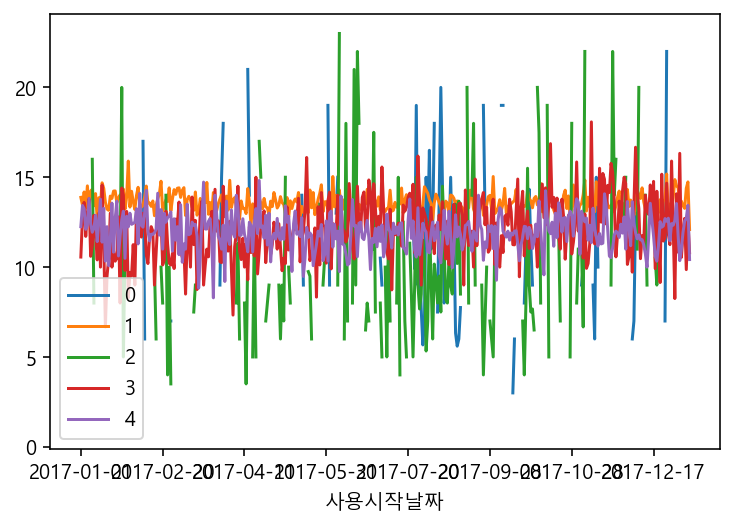

In [88]:
plt.figure(figsize=(10,6))
df_time[['0','1','2','3','4']].plot()

In [ ]:
14320

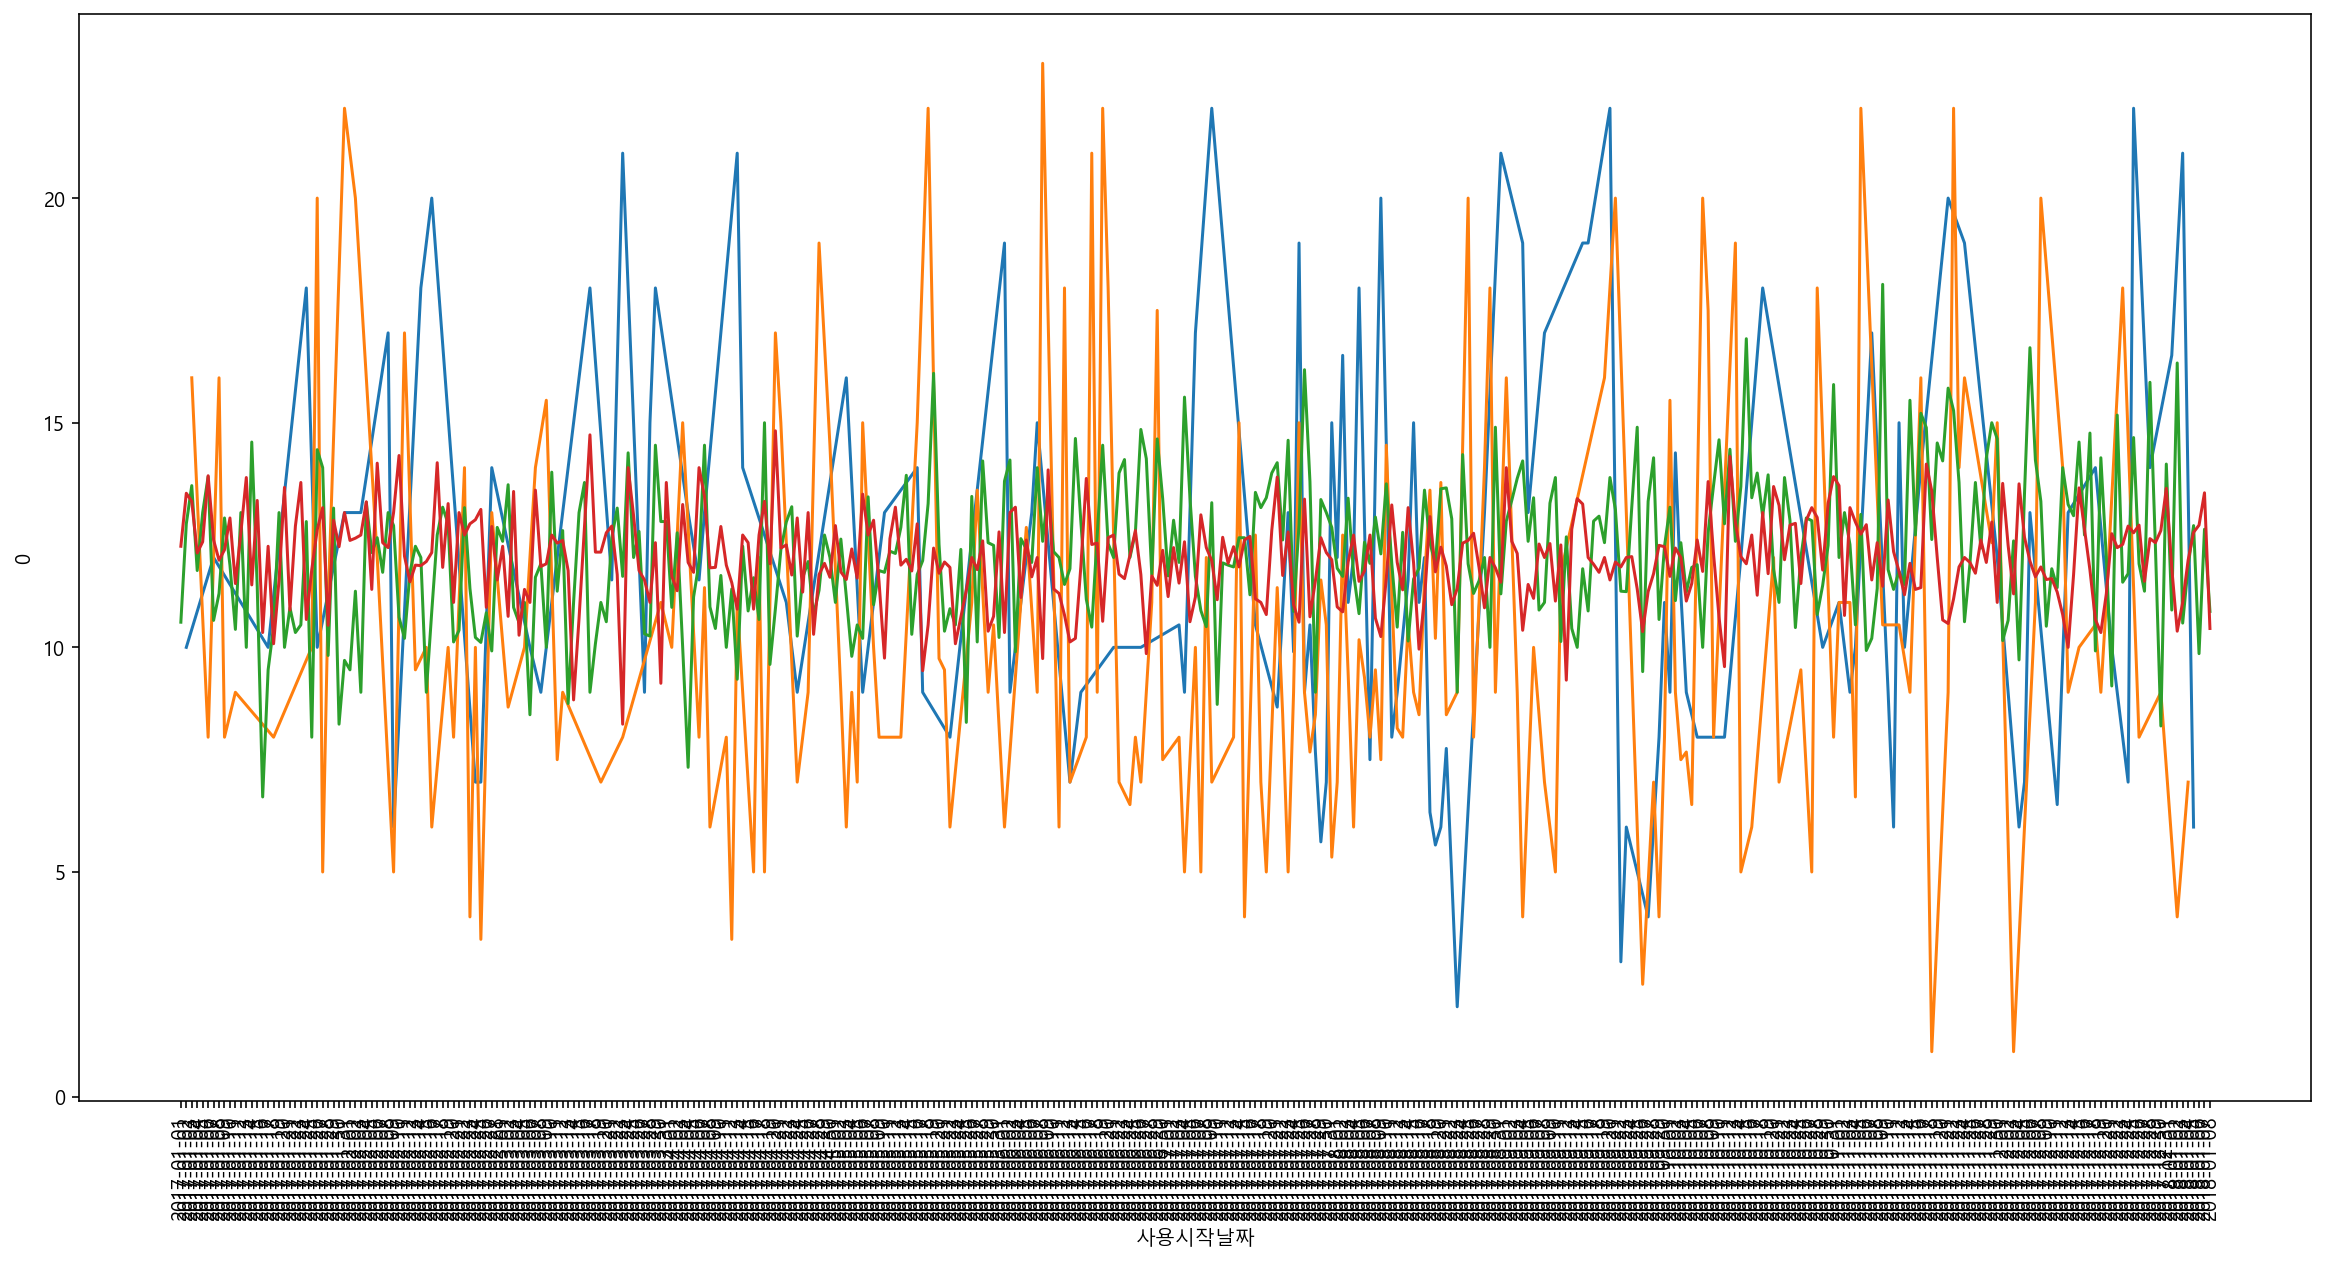

In [111]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_time,x = '사용시작날짜', y = '0')
#sns.lineplot(data = df_time,x = '사용시작날짜', y = '1')
sns.lineplot(data = df_time,x = '사용시작날짜', y = '2')
sns.lineplot(data = df_time,x = '사용시작날짜', y = '3')
sns.lineplot(data = df_time,x = '사용시작날짜', y = '4')
plt.xticks(rotation=90)
plt.show()

In [112]:
df

,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster,k_silhouette_coeff,사용시작시간대,사용시작날짜
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2016123100078,모닝,20호8555,서울번동3,2016.10,GRDA05,jjy2837,48,남,2013-11-25 00:00,2016-12-31 15:24:00,2017-01-01 01:00:00,2017-01-01 21:00:00,2017,1,1,53,1,17/01/01,1,01:00,1200.0,20.000000,종료,2017-01-01 00:59:00,2017-01-01 20:33:00,1.0,9.600000,19.566667,47760,383,105210,47760,0.0,0.0,57450.0,0.0,사용안함,3213730.0,2016-02-07 11:00:00,2018-01-13 09:00:00,서울특별시 강북구 번3동 주공아파트 206동 704호,2017-01-01 00:59:00.000000,6.865824,-0.340597,-0.316788,3,0.331008,00,2017-01-01
3,2017010100002,K3,10호7524,인천소래3,2015.08,GRDA06,youmi0217,28,여,2014-03-19 00:00,2017-01-01 00:57:00,2017-01-01 01:00:00,2017-01-01 03:30:00,2017,1,1,53,1,17/01/01,1,01:00,150.0,2.500000,종료,2017-01-01 01:02:00,2017-01-01 03:30:00,1.0,0.050000,2.466667,17130,54,25770,13200,3930.0,0.0,8640.0,0.0,사용안함,4419890.0,2016-02-17 18:00:00,2018-01-07 18:40:00,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호,2017-01-01 01:02:00.000000,0.280375,0.439938,-0.548629,1,0.674789,01,2017-01-01
4,2017010100004,모닝,36하1412,평택반지1,2016.12,GRDA02,yunseo1115,33,여,2016-12-20 18:35,2017-01-01 01:38:00,2017-01-01 01:50:00,2017-01-01 04:20:00,2017,1,1,53,1,17/01/01,1,01:50,150.0,2.500000,종료,2017-01-01 01:45:00,2017-01-01 04:13:00,1.0,0.200000,2.466667,12300,59,21150,12300,0.0,0.0,8850.0,0.0,사용안함,242480.0,2017-01-01 01:50:00,2017-02-04 14:30:00,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605",2017-01-01 01:45:00.000000,0.737699,-0.175668,-0.515625,1,0.635128,01,2017-01-01
5,2016123100108,모닝,29호3879,남양주별사랑2-2,2016.10,GRDA02,campos2,33,여,2016-10-05 19:51,2016-12-31 19:11:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017,1,1,53,1,17/01/01,2,02:00,60.0,1.000000,종료,2017-01-01 02:00:00,2017-01-01 03:00:00,1.0,6.816667,1.000000,0,0,0,0,0.0,0.0,0.0,0.0,사용안함,114310.0,2016-10-12 20:00:00,2017-02-27 12:50:00,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호",2017-01-01 02:00:00.000000,-0.423065,-0.787428,-0.002313,1,0.803385,02,2017-01-01
7,2017010100010,모닝,24호5482,부천범박1,2016.10,GRDA02,h2oks,38,남,2015-12-14 00:00,2017-01-01 04:28:00,2017-01-01 04:40:00,2017-01-01 06:40:00,2017,1,1,53,1,17/01/01,4,04:40,120.0,2.000000,종료,2017-01-01 04:35:00,2017-01-01 06:40:00,1.0,0.200000,2.083333,9840,51,17490,9840,0.0,0.0,7650.0,0.0,사용안함,444220.0,2016-01-15 11:30:00,2017-11-02 15:10:00,경기도 부천시 소사구 괴안동 범박휴먼시아1단지아파트 113동801호,2017-01-01 04:34:59.999999,0.593228,-0.308438,-0.479163,1,0.684782,04,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81211,2018010800157,모닝,10호7872,김포초당1,2016.10,GRDA05,jongmi1121,30,여,2016-10-27 10:45,2018-01-08 16:27:00,2018-01-08 18:20:00,2018-01-08 19:20:00,2018,1,8,2,2,18/01/08,18,18:20,60.0,1.000000,종료,2018-01-08 18:25:00,2018-01-08 18:54:00,2.0,1.883333,0.483333,3540,4,4180,3540,0.0,0.0,640.0,0.0,사용안함,2033470.0,2016-12-24 20:30:00,2018-01-08 18:20:00,"경기도 김포시 김포한강2로 144 (장기동, 초당마을주공아파트) 105-1104호",2018-01-08 18:25:00.000000,-0.222453,-0.533453,-0.205355,1,0.850169,18,2018-01-08
81213,2018010800176,모닝,36호6242,시흥능곡9,2016.06,GRDA03,rla098,45,남,2013-12-24 00:00,2018-01-08 18:25:00,2018-01-08 19:00:00,2018-01-08 21:00:00,2018,1,8,2,2,18/01/08,19,19:00,120.0,2.000000,종료,2018-01-08 19:00:00,2018-01-08 20:40:00,2.0,0.583333,1.666667,6370,18,9250,6370,0.0,0.0,2880.0,0.0,사용안함,356400.0,2016-06-03 21:30:00,2018-01-08 19:00:00,경기도 시흥시 능곡동 907동604호,2018-01-08 19:00:00.000000,-0.082025,-0.405260,-0.150109,1,0.846231,19,2018-01-08
81215,2018010800182,모닝,40허4866,평택소사벌2,2016.10,GRDA05,hyeon1103,38,여,2017-10-27 18:51,2018-01-08 19:05:00,2018-01-08 19:10:00,2018-01-08 21:00:00,2018,1,8,2,2,18/01/08,19,19:10,110.0,1.833333,종료,2018-01-08 19

In [359]:
df = pd.read_csv('df_cluster.csv')

In [360]:
df

,index,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster
0,2,2016123100078,모닝,20호8555,서울번동3,2016.10,GRDA05,jjy2837,48,남,2013-11-25 00:00,2016-12-31 15:24:00,2017-01-01 01:00:00,2017-01-01 21:00:00,2017,1,1,53,1,17/01/01,1,01:00,1200.0,20.000000,종료,2017-01-01 00:59:00,2017-01-01 20:33:00,1.0,9.600000,19.566667,47760,383,105210,47760,0.0,0.0,57450.0,0.0,사용안함,3213730.0,2016-02-07 11:00:00,2018-01-13 09:00:00,서울특별시 강북구 번3동 주공아파트 206동 704호,2017-01-01 00:59:00.000000,5.409930,0.191991,0.226913,3
1,3,2017010100002,K3,10호7524,인천소래3,2015.08,GRDA06,youmi0217,28,여,2014-03-19 00:00,2017-01-01 00:57:00,2017-01-01 01:00:00,2017-01-01 03:30:00,2017,1,1,53,1,17/01/01,1,01:00,150.0,2.500000,종료,2017-01-01 01:02:00,2017-01-01 03:30:00,1.0,0.050000,2.466667,17130,54,25770,13200,3930.0,0.0,8640.0,0.0,사용안함,4419890.0,2016-02-17 18:00:00,2018-01-07 18:40:00,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호,2017-01-01 01:02:00.000000,0.335581,0.421427,-0.568906,1
2,4,2017010100004,모닝,36하1412,평택반지1,2016.12,GRDA02,yunseo1115,33,여,2016-12-20 18:35,2017-01-01 01:38:00,2017-01-01 01:50:00,2017-01-01 04:20:00,2017,1,1,53,1,17/01/01,1,01:50,150.0,2.500000,종료,2017-01-01 01:45:00,2017-01-01 04:13:00,1.0,0.200000,2.466667,12300,59,21150,12300,0.0,0.0,8850.0,0.0,사용안함,242480.0,2017-01-01 01:50:00,2017-02-04 14:30:00,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605",2017-01-01 01:45:00.000000,0.495428,-0.088604,-0.425021,0
3,5,2016123100108,모닝,29호3879,남양주별사랑2-2,2016.10,GRDA02,campos2,33,여,2016-10-05 19:51,2016-12-31 19:11:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017,1,1,53,1,17/01/01,2,02:00,60.0,1.000000,종료,2017-01-01 02:00:00,2017-01-01 03:00:00,1.0,6.816667,1.000000,0,0,0,0,0.0,0.0,0.0,0.0,사용안함,114310.0,2016-10-12 20:00:00,2017-02-27 12:50:00,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호",2017-01-01 02:00:00.000000,-0.383008,-0.808104,-0.016261,0
4,7,2017010100010,모닝,24호5482,부천범박1,2016.10,GRDA02,h2oks,38,남,2015-12-14 00:00,2017-01-01 04:28:00,2017-01-01 04:40:00,2017-01-01 06:40:00,2017,1,1,53,1,17/01/01,4,04:40,120.0,2.000000,종료,2017-01-01 04:35:00,2017-01-01 06:40:00,1.0,0.200000,2.083333,9840,51,17490,9840,0.0,0.0,7650.0,0.0,사용안함,444220.0,2016-01-15 11:30:00,2017-11-02 15:10:00,경기도 부천시 소사구 괴안동 범박휴먼시아1단지아파트 113동801호,2017-01-01 04:34:59.999999,0.400711,-0.241183,-0.407533,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67924,81211,2018010800157,모닝,10호7872,김포초당1,2016.10,GRDA05,jongmi1121,30,여,2016-10-27 10:45,2018-01-08 16:27:00,2018-01-08 18:20:00,2018-01-08 19:20:00,2018,1,8,2,2,18/01/08,18,18:20,60.0,1.000000,종료,2018-01-08 18:25:00,2018-01-08 18:54:00,2.0,1.883333,0.483333,3540,4,4180,3540,0.0,0.0,640.0,0.0,사용안함,2033470.0,2016-12-24 20:30:00,2018-01-08 18:20:00,"경기도 김포시 김포한강2로 144 (장기동, 초당마을주공아파트) 105-1104호",2018-01-08 18:25:00.000000,-0.360603,-0.489047,-0.151260,0
67925,81213,2018010800176,모닝,36호6242,시흥능곡9,2016.06,GRDA03,rla098,45,남,2013-12-24 00:00,2018-01-08 18:25:00,2018-01-08 19:00:00,2018-01-08 21:00:00,2018,1,8,2,2,18/01/08,19,19:00,120.0,2.000000,종료,2018-01-08 19:00:00,2018-01-08 20:40:00,2.0,0.583333,1.666667,6370,18,9250,6370,0.0,0.0,2880.0,0.0,사용안함,356400.0,2016-06-03 21:30:00,2018-01-08 19:00:00,경기도 시흥시 능곡동 907동604호,2018-01-08 19:00:00.000000,-0.171481,-0.373128,-0.113256,0
67926,81214,2018010800161,모닝,10호7751,화성동탄새강5,2016.06,GRDA04,jjun1266,39,남,2014-01-20 00:00,2018-01-08 16:38:00,2018-01-08 19:10:00,2018-01-08 20:50:00,2018,1,8,2,2,18/01/08,19,19:10,100.0,1.666667,종료,2018-01-08 19:14:00,2018-01-08 20:52:00,2.0,2.533333,1.633333,6190,5,6990,5310,880.0,0.0,800.0,0.0,사용안함,1432390.0,2015-12-28 09:30:00,2018-01-09 08:50:00,경기도 화성시 동탄중앙로 99 519동 2201호,2018-01-08 19:14:00.000000,-0.420772,-0.287305,-0.091897,0

In [362]:
df['k_means_cluster'].value_counts(normalize = True)

0    0.773145
1    0.189831
4    0.021522
3    0.013411
2    0.002090
Name: k_means_cluster, dtype: float64

In [121]:
df['사용시작시간대'] = df['사용시작'].str[11:13]

In [122]:
df['사용시작날짜'] = df['사용시작'].str[:10]

In [130]:
df['나이대'] = df['연령'].apply(lambda x : '20대' if x < 30 else('30대' if x < 40 else('40대' if x < 50 else('50대' if x < 60 else ('60대' if x < 70 else '70대 이상')))))

In [131]:
df_0 = df.query('k_means_cluster == 0')
df_0.shape

(52519, 51)

In [132]:
df_1 = df.query('k_means_cluster == 1')
df_1.shape

(12895, 51)

In [133]:
df_2 = df.query('k_means_cluster == 2')
df_2.shape

(142, 51)

In [134]:
df_3 = df.query('k_means_cluster == 3')
df_3.shape

(911, 51)

In [135]:
df_4 = df.query('k_means_cluster == 4')
df_4.shape

(1462, 51)

<AxesSubplot:>

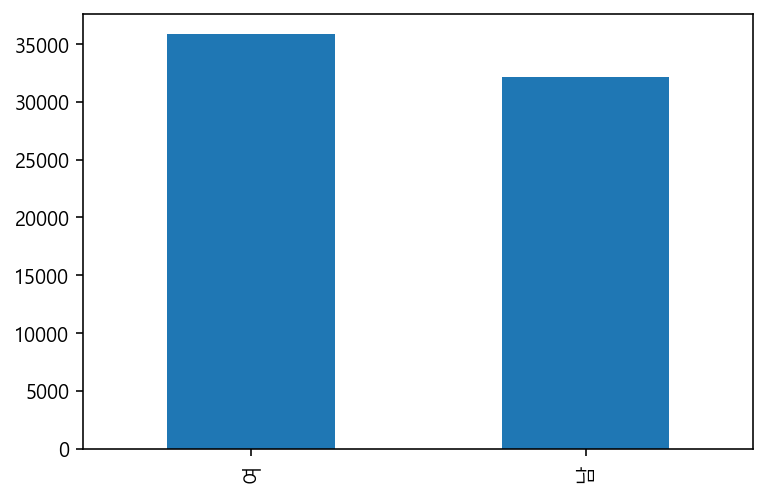

In [138]:
df['성별'].value_counts().plot.bar()

<AxesSubplot:ylabel='나이대'>

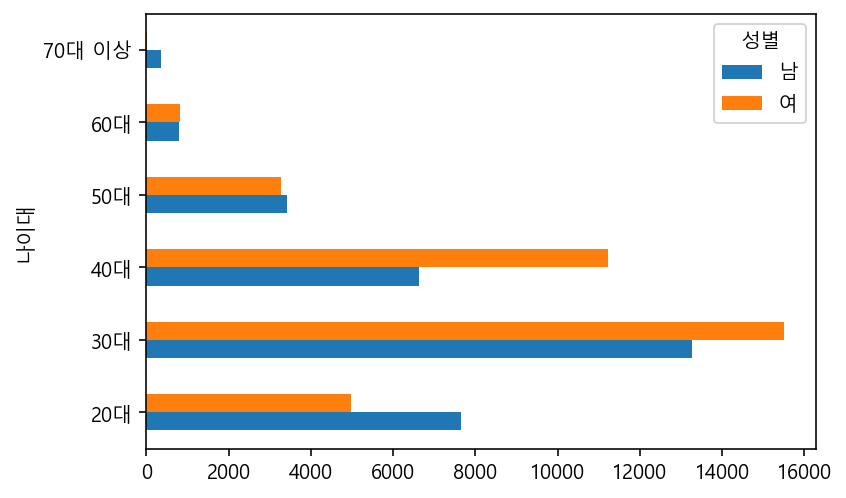

In [139]:
df.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:>

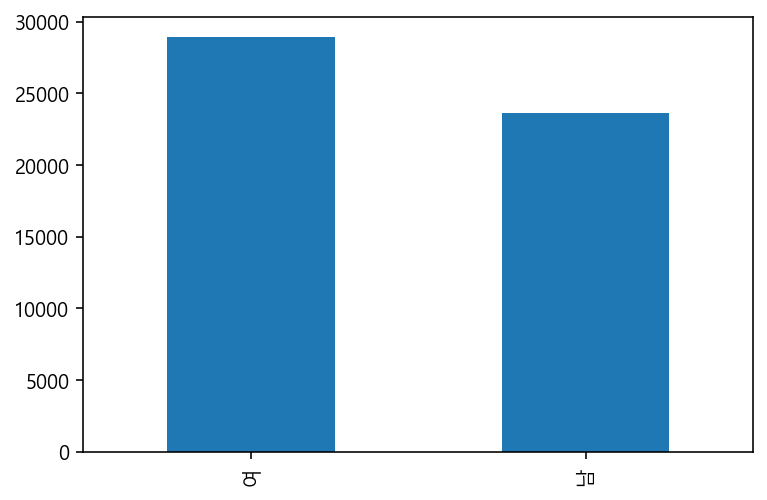

In [140]:
df_0['성별'].value_counts().plot.bar()

<AxesSubplot:ylabel='나이대'>

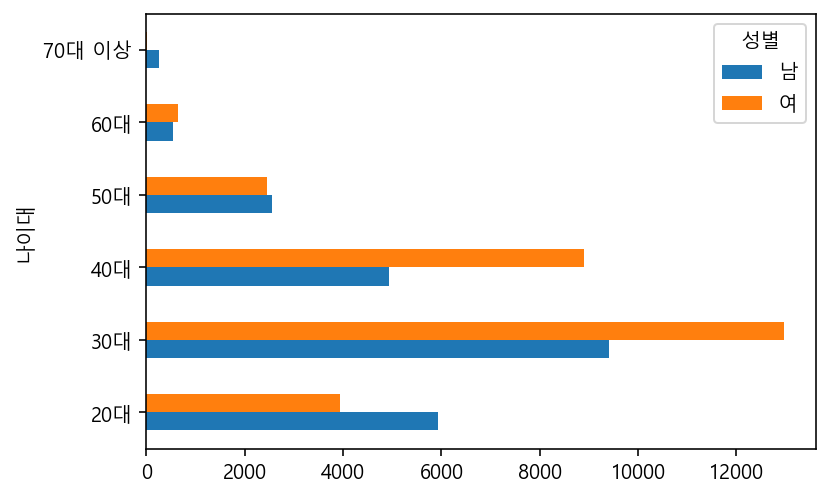

In [141]:
df_0.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:ylabel='나이대'>

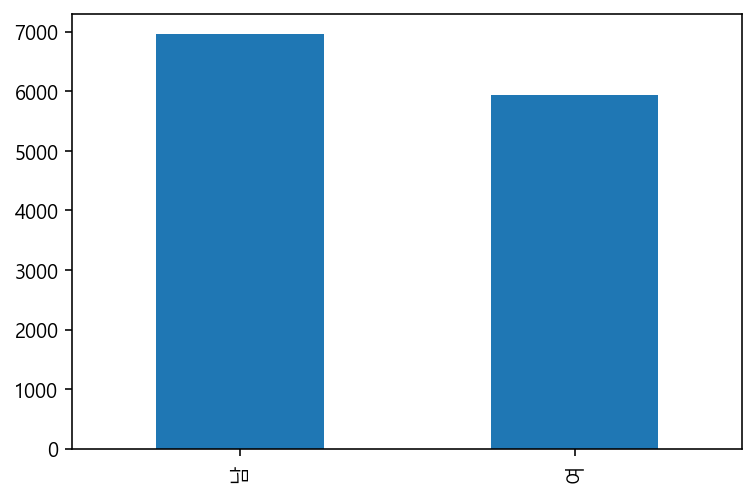

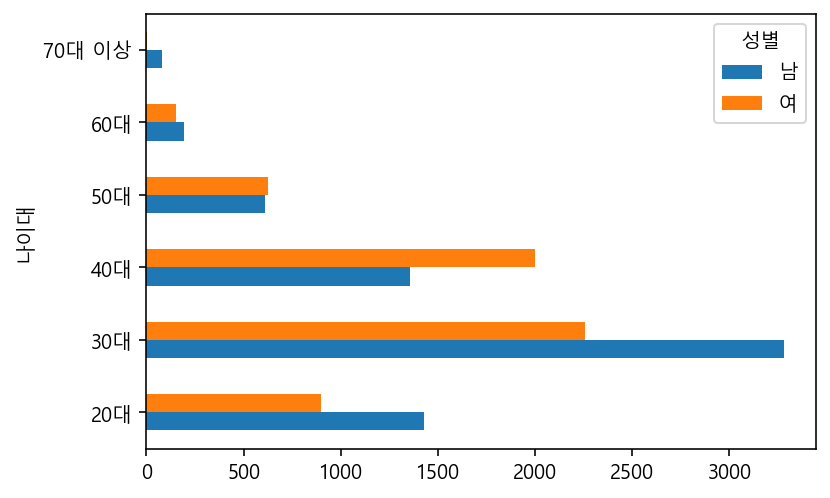

In [142]:
df_1['성별'].value_counts().plot.bar()
df_1.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:ylabel='나이대'>

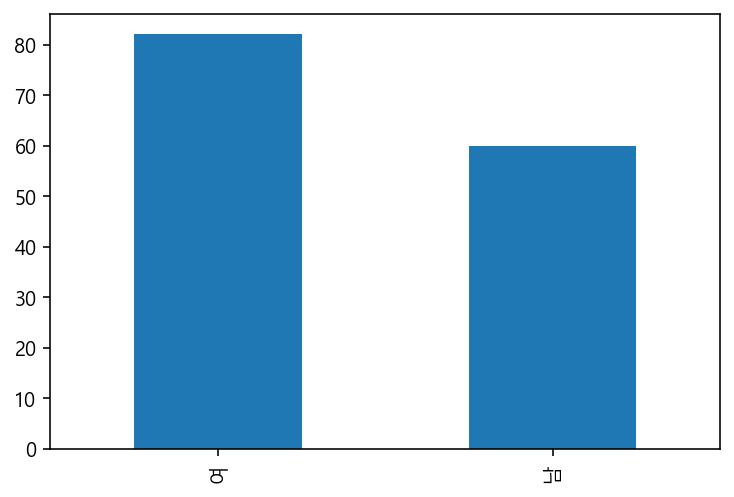

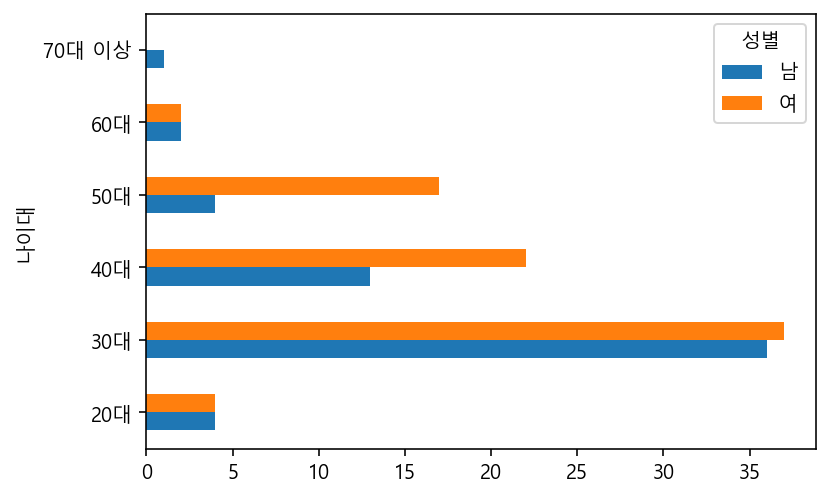

In [143]:
df_2['성별'].value_counts().plot.bar()
df_2.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:ylabel='나이대'>

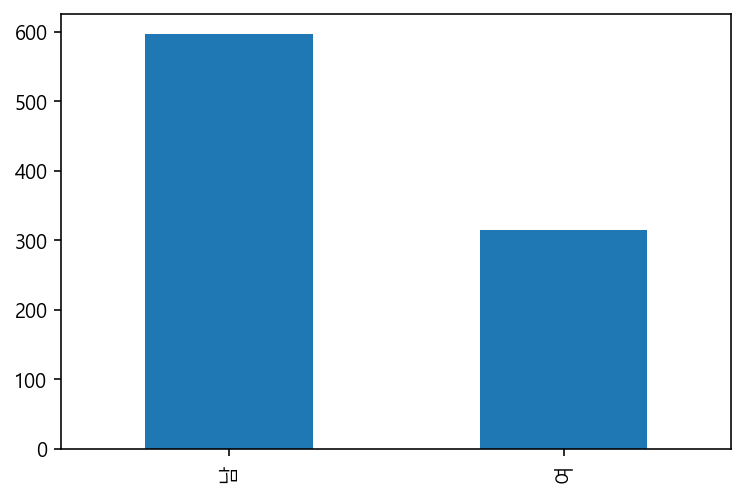

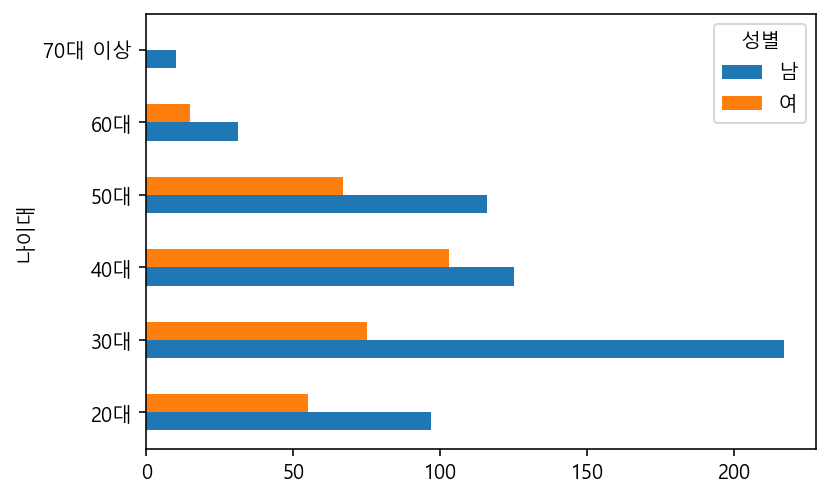

In [144]:
df_3['성별'].value_counts().plot.bar()
df_3.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:ylabel='나이대'>

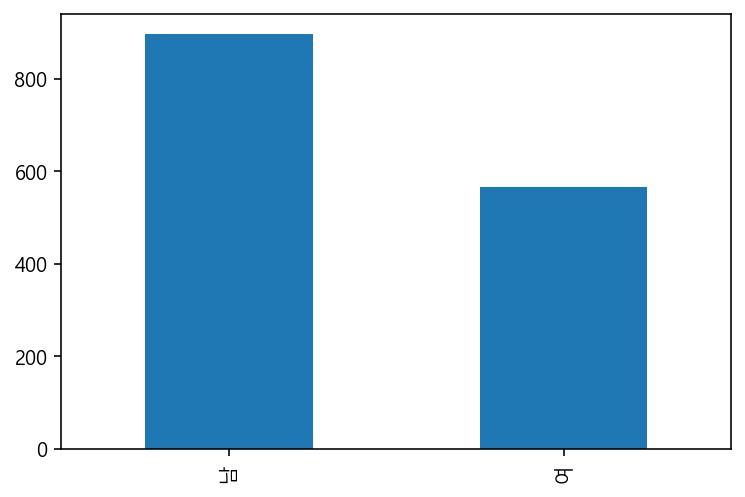

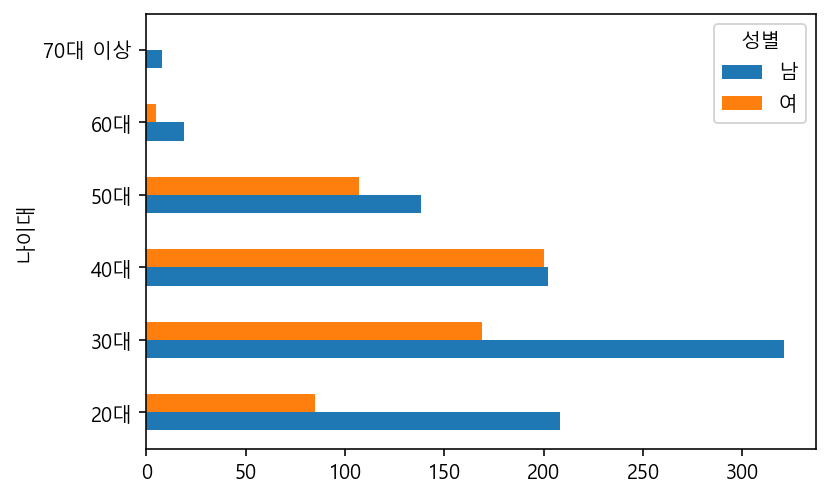

In [145]:
df_4['성별'].value_counts().plot.bar()
df_4.groupby(['성별', '나이대'], as_index = False)['예약번호'].agg('count').pivot('나이대','성별','예약번호').plot(kind = 'barh')

<AxesSubplot:xlabel='사용시작시간대', ylabel='count'>

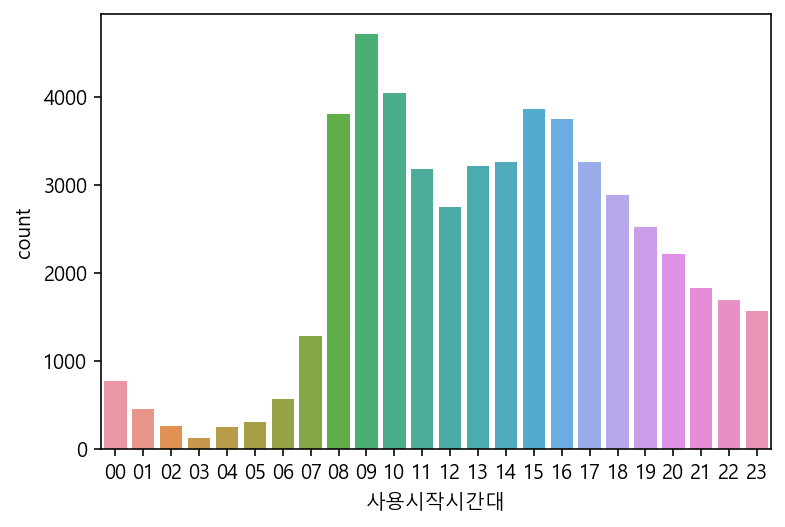

In [243]:
df_0 = df_0.sort_values(by=["사용시작시간대"], ascending=[True])
sns.countplot(data = df_0, x = '사용시작시간대')

In [299]:
df_0

,index,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster,사용시작시간대,사용시작날짜,나이대,출퇴근시간대사용여부,사용요일_num,day,반납day
65369,78121,2017122600001,모닝,10호7872,김포초당1,2016.10,GRDA03,toobiki,29,남,2016-12-18 23:55,2017-12-26 00:12:00,2017-12-26 00:20:00,2017-12-26 00:50:00,2017,12,26,52,3,17/12/26,0,00:20,30.0,0.500000,종료,2017-12-26 00:15:00,2017-12-26 00:48:00,3.0,0.133333,0.550000,1770,4,2410,1770,0.0,0.0,640.0,0.0,사용안함,170850.0,2016-12-19 03:20:00,2018-01-07 18:50:00,경기도 김포시 장기동 1598 초당마을주공아파트 109-705,2017-12-26 00:15:00.000000,-0.308382,-0.631016,-0.197898,0,00,2017-12-26,20대,0,TUESDAY,1,1
50449,60428,2017101500226,레이,10호8082,성남판교봇들6,2017.03,GRDA06,kgum903,26,남,2017-08-12 15:47,2017-10-15 23:49:00,2017-10-15 23:50:00,2017-10-16 07:00:00,2017,10,15,41,1,17/10/15,23,23:50,430.0,7.166667,종료,2017-10-16 00:02:00,2017-10-16 06:47:00,2.0,0.016667,6.750000,5000,13,7080,5000,0.0,0.0,2080.0,0.0,사용안함,1518460.0,2017-08-20 23:40:00,2018-01-07 19:50:00,"경기도 성남시 분당구 동판교로 212 (삼평동, 봇들마을6단지아파트) 605-207",2017-10-16 00:02:00.000000,-0.494580,-0.818929,1.055359,0,00,2017-10-16,20대,0,MONDAY,0,0
5441,6473,2017021500002,모닝,20호8554,서울중계9,2016.10,GRDA02,mentalist,40,남,2017-02-05 02:50:00,2017-02-15 00:35:00,2017-02-15 00:40:00,2017-02-15 05:00:00,2017,2,15,7,4,17/02/15,0,00:40,260.0,4.333333,종료,2017-02-15 00:36:00,2017-02-15 05:03:00,4.0,0.083333,4.450000,15920,71,26570,14160,1760.0,0.0,10650.0,0.0,사용안함,508520.0,2017-02-05 03:20:00,2017-09-18 02:50:00,"서울특별시 노원구 노원로16길 15 (하계동, 중계주공9단지아파트) 905동 1501호",2017-02-15 00:36:00.000000,0.584112,0.060846,-0.219241,0,00,2017-02-15,40대,0,WEDNESDAY,2,2
43548,52077,2017091200275,K3,24호1994,고양삼송원흥11(행복주택),2016.08,GRDA02,kjh7823,27,남,2017-02-19 19:58,2017-09-12 23:11:00,2017-09-12 23:20:00,2017-09-13 07:00:00,2017,9,12,37,3,17/09/12,23,23:20,460.0,7.666667,종료,2017-09-13 00:22:00,2017-09-13 01:56:00,4.0,0.150000,1.566667,5000,50,13000,5000,0.0,0.0,8000.0,0.0,사용안함,374780.0,2017-02-20 14:50:00,2017-12-06 23:30:00,"경기도 고양시 덕양구 원흥1로 25 (원흥동, 고양삼송엘에이치원흥마을11단지) 11...",2017-09-13 00:22:00.000000,0.327425,-1.093517,0.857915,0,00,2017-09-13,20대,0,WEDNESDAY,2,2
43552,52081,2017091200282,모닝,20호8552,남양주별사랑2-7,2016.10,GRDA05,ymsyoon,29,남,2017-01-11 00:13,2017-09-12 23:46:00,2017-09-13 00:00:00,2017-09-13 00:50:00,2017,9,13,37,4,17/09/13,0,00:00,50.0,0.833333,종료,2017-09-13 00:04:00,2017-09-13 00:57:00,4.0,0.233333,0.883333,3240,28,7440,2360,880.0,0.0,4200.0,0.0,사용안함,1872160.0,2017-01-12 23:50:00,2018-01-08 01:50:00,경기도 남양주시 별내동 921 별사랑마을2-7단지아파트 2701동 1307호,2017-09-13 00:04:00.000000,0.114042,-0.652633,-0.318260,0,00,2017-09-13,20대,0,WEDNESDAY,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24276,28616,2017061900240,모닝,10호7751,화성동탄새강5,2016.06,GRDA03,zaq123,40,남,2016-09-12 00:00:00,2017-06-19 23:14:00,2017-06-19 23:20:00,2017-06-20 02:00:00,2017,6,19,25,2,17/06/19,23,23:20,160.0,2.666667,종료,2017-06-19 23:18:00,2017-06-20 01:00:00,3.0,0.100000,1.700000,6600,27,10650,6600,0.0,0.0,4050.0,0.0,할인율 주중/주말(휴일포함) 30% 할인,847630.0,2016-09-27 20:00:00,2017-11-22 17:00:00,경기도 화성시 반송동 동탄새강마을휴먼시아아파트 528동2002호,2017-06-19 23:18:00.000000,-0.029088,-0.453847,-0.032576,0,23,2017-06-19,40대,0,MONDAY,0,1
24275,28615,2017061900237,모닝,20호8570,서울강남7(아이파크),2016.10,GRDA04,kavante,27,남,2016-11-05 23:10:00,2017-06-19 23:01:00,2017-06-19 23:10:00,2017-06-20 00:40:00,2017,6,19,25,2,17/06/19,23,23:10,90.0,1.500000,종료,2017-06-19 23:05:00,2017-06-20 00:37:00,3.0,0.150000,1.533333,6180,28,10380,3540,2640.0,0.0,4200.0,0.0,사용안함,674730.0,2016-12-07 23:20:00,2018-01-01 09:00:00,"서울특별시 강남구 자곡로 175 (자곡동, LH강남아이파크) 708동 1402호",2017-06-19 23:05:00.000000,0.044643,-0.424100,-0.268851,0,23,2017-06-19,20대,0,MONDA

In [278]:
df0_시간대 = df_0.groupby('사용시작시간대')[['예약번호']].count().reset_index()
df0_시간대.columns=['사용시작시간대','0']

In [279]:
df0_시간대['0'].sum()

52519

In [280]:
df0_시간대['0'] = df0_시간대['0'] / 52519

In [282]:
df1_시간대 = df_1.groupby('사용시작시간대')[['예약번호']].count().reset_index()
df1_시간대.columns=['사용시작시간대','1']
df1_시간대['1'].sum()

12895

In [283]:
df1_시간대['1'] = df1_시간대['1'] / 12895

In [284]:
df2_시간대 = df_2.groupby('사용시작시간대')[['예약번호']].count().reset_index()
df2_시간대.columns=['사용시작시간대','2']
df2_시간대['2'].sum()

142

In [285]:
df2_시간대['2'] = df2_시간대['2'] / 142

In [286]:
df3_시간대 = df_3.groupby('사용시작시간대')[['예약번호']].count().reset_index()
df3_시간대.columns=['사용시작시간대','3']
df3_시간대['3'].sum()

911

In [287]:
df3_시간대['3'] = df3_시간대['3'] / 911

In [288]:
df4_시간대 = df_4.groupby('사용시작시간대')[['예약번호']].count().reset_index()
df4_시간대.columns=['사용시작시간대','4']
df4_시간대['4'].sum()

1462

In [289]:
df4_시간대['4'] = df4_시간대['4'] / 1462

In [290]:
df_시간대 = df0_시간대.merge(df1_시간대, how = 'left')
df_시간대 = df_시간대.merge(df2_시간대, how = 'left')
df_시간대 = df_시간대.merge(df3_시간대, how = 'left')
df_시간대 = df_시간대.merge(df4_시간대, how = 'left')
df_시간대

,사용시작시간대,0,1,2,3,4
0,00,0.014547,0.002404,0.056338,0.008782,0.007524
1,01,0.008664,0.001318,0.007042,0.006586,0.003420
2,02,0.004836,0.001008,NaN,0.004391,0.002736
3,03,0.002399,0.001163,NaN,0.006586,0.003420
4,04,0.004589,0.001784,0.021127,0.016465,0.005472
5,05,0.005788,0.004110,0.028169,0.046103,0.017784
6,06,0.010720,0.015510,0.063380,0.085620,0.045144
7,07,0.024372,0.031873,0.070423,0.102086,0.055404
8,08,0.072488,0.074758,0.112676,0.099890,0.074555
9,09,0.089663,0.120744,0.091549,0.121844,0.103283


In [291]:
df_시간대 = df_시간대.set_index(['사용시작시간대']); df_시간대

,0,1,2,3,4
사용시작시간대,,,,,
00,0.014547,0.002404,0.056338,0.008782,0.007524
01,0.008664,0.001318,0.007042,0.006586,0.003420
02,0.004836,0.001008,NaN,0.004391,0.002736
03,0.002399,0.001163,NaN,0.006586,0.003420
04,0.004589,0.001784,0.021127,0.016465,0.005472
05,0.005788,0.004110,0.028169,0.046103,0.017784
06,0.010720,0.015510,0.063380,0.085620,0.045144
07,0.024372,0.031873,0.070423,0.102086,0.055404
08,0.072488,0.074758,0.112676,0.099890,0.074555


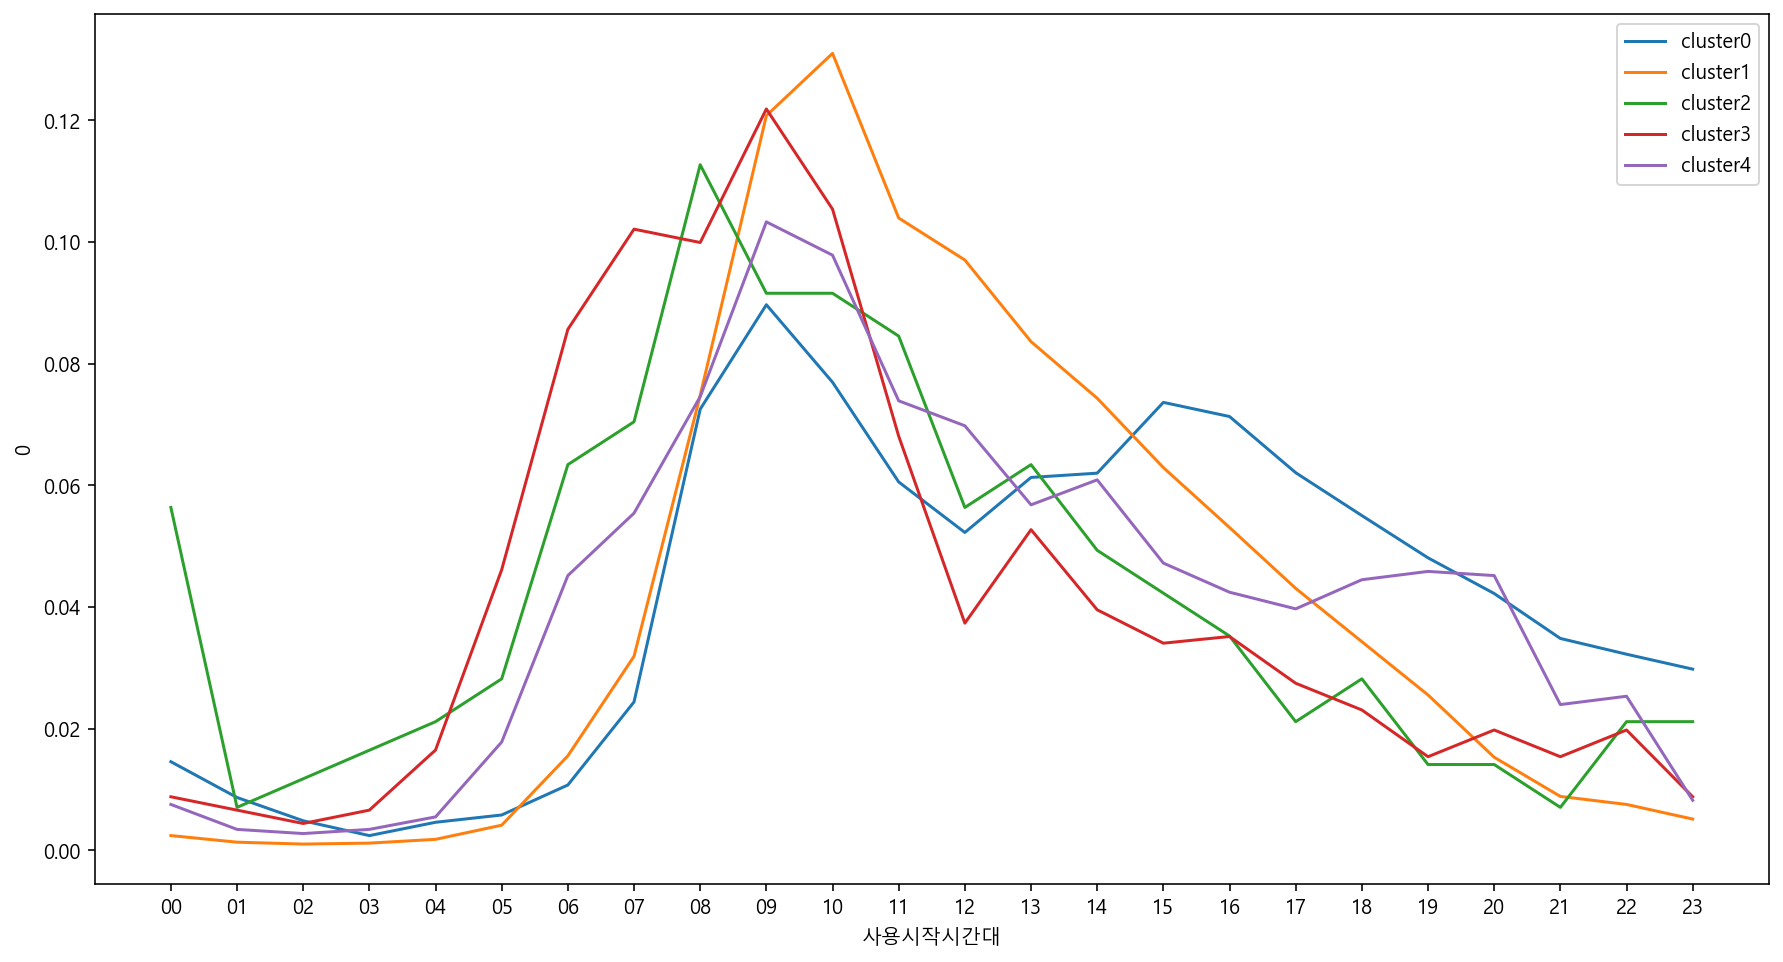

In [298]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df_시간대,x = '사용시작시간대', y = '0', label = 'cluster0')
sns.lineplot(data = df_시간대,x = '사용시작시간대', y = '1', label = 'cluster1')
sns.lineplot(data = df_시간대,x = '사용시작시간대', y = '2', label = 'cluster2')
sns.lineplot(data = df_시간대,x = '사용시작시간대', y = '3', label = 'cluster3')
sns.lineplot(data = df_시간대,x = '사용시작시간대', y = '4', label = 'cluster4')
plt.legend()
plt.show()

In [301]:
df0_시간대평일 = df_0.query('day < 5').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df0_시간대평일.columns=['사용시작시간대','0']
df0_시간대평일['0'].sum()

40429

In [302]:
df0_시간대평일['0'] = df0_시간대평일['0'] / 40429

In [303]:
df1_시간대평일 = df_1.query('day < 5').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df1_시간대평일.columns=['사용시작시간대','1']
df1_시간대평일['1'].sum()

7089

In [304]:
df1_시간대평일['1'] = df1_시간대평일['1'] / 7089

In [305]:
df2_시간대평일 = df_2.query('day < 5').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df2_시간대평일.columns=['사용시작시간대','2']
df2_시간대평일['2'].sum()

107

In [306]:
df2_시간대평일['2'] = df2_시간대평일['2'] / 107

In [307]:
df3_시간대평일 = df_3.query('day < 5').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df3_시간대평일.columns=['사용시작시간대','3']
df3_시간대평일['3'].sum()

604

In [308]:
df3_시간대평일['3'] = df3_시간대평일['3'] / 604

In [309]:
df4_시간대평일 = df_4.query('day < 5').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df4_시간대평일.columns=['사용시작시간대','4']
df4_시간대평일['4'].sum()

970

In [310]:
df4_시간대평일['4'] = df4_시간대평일['4'] / 970

In [311]:
df_시간대평일 = df0_시간대평일.merge(df1_시간대, how = 'left')
df_시간대평일 = df_시간대평일.merge(df2_시간대, how = 'left')
df_시간대평일 = df_시간대평일.merge(df3_시간대, how = 'left')
df_시간대평일 = df_시간대평일.merge(df4_시간대, how = 'left')
df_시간대평일 = df_시간대평일.set_index(['사용시작시간대']); df_시간대

,0,1,2,3,4
사용시작시간대,,,,,
00,0.014547,0.002404,0.056338,0.008782,0.007524
01,0.008664,0.001318,0.007042,0.006586,0.003420
02,0.004836,0.001008,NaN,0.004391,0.002736
03,0.002399,0.001163,NaN,0.006586,0.003420
04,0.004589,0.001784,0.021127,0.016465,0.005472
05,0.005788,0.004110,0.028169,0.046103,0.017784
06,0.010720,0.015510,0.063380,0.085620,0.045144
07,0.024372,0.031873,0.070423,0.102086,0.055404
08,0.072488,0.074758,0.112676,0.099890,0.074555


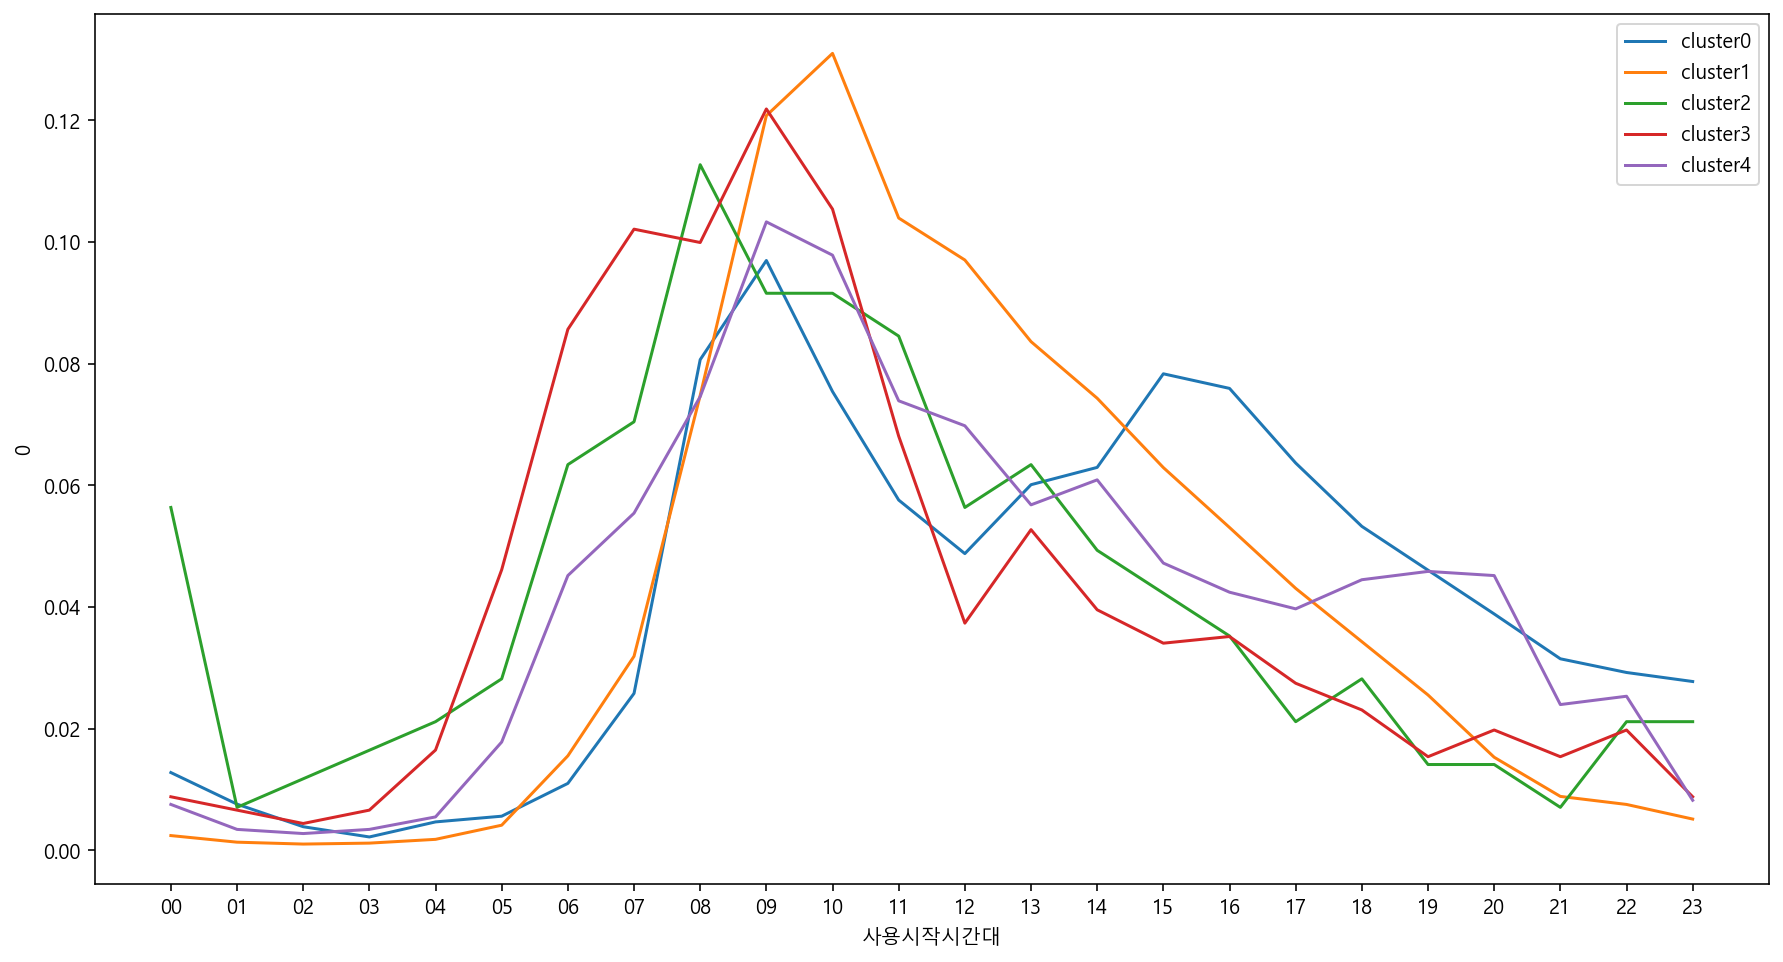

In [312]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df_시간대평일,x = '사용시작시간대', y = '0', label = 'cluster0')
sns.lineplot(data = df_시간대평일,x = '사용시작시간대', y = '1', label = 'cluster1')
sns.lineplot(data = df_시간대평일,x = '사용시작시간대', y = '2', label = 'cluster2')
sns.lineplot(data = df_시간대평일,x = '사용시작시간대', y = '3', label = 'cluster3')
sns.lineplot(data = df_시간대평일,x = '사용시작시간대', y = '4', label = 'cluster4')
plt.legend()
plt.show()

In [320]:
df0_시간대주말 = df_0.query('day > 4').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df0_시간대주말.columns=['사용시작시간대','0']
df0_시간대주말['0'].sum()

12090

In [321]:
df0_시간대주말['0'] = df0_시간대주말['0'] / 12090

In [322]:
df1_시간대주말 = df_1.query('day > 4').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df1_시간대주말.columns=['사용시작시간대','1']
df1_시간대주말['1'].sum()

5806

In [323]:
df1_시간대주말['1'] = df1_시간대주말['1'] / 5806

In [324]:
df2_시간대주말 = df_2.query('day > 4').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df2_시간대주말.columns=['사용시작시간대','2']
df2_시간대주말['2'].sum()

35

In [325]:
df2_시간대주말['2'] = df2_시간대주말['2'] / 35

In [326]:
df3_시간대주말 = df_3.query('day > 4').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df3_시간대주말.columns=['사용시작시간대','3']
df3_시간대주말['3'].sum()

307

In [327]:
df3_시간대주말['3'] = df3_시간대주말['3'] / 307

In [328]:
df4_시간대주말 = df_4.query('day > 4').groupby('사용시작시간대')[['예약번호']].count().reset_index()
df4_시간대주말.columns=['사용시작시간대','4']
df4_시간대주말['4'].sum()

492

In [329]:
df4_시간대주말['4'] = df4_시간대주말['4'] / 492

In [330]:
df_시간대주말 = df0_시간대주말.merge(df1_시간대, how = 'left')
df_시간대주말 = df_시간대주말.merge(df2_시간대, how = 'left')
df_시간대주말 = df_시간대주말.merge(df3_시간대, how = 'left')
df_시간대주말 = df_시간대주말.merge(df4_시간대, how = 'left')
df_시간대주말 = df_시간대주말.set_index(['사용시작시간대']); df_시간대

,0,1,2,3,4
사용시작시간대,,,,,
00,0.014547,0.002404,0.056338,0.008782,0.007524
01,0.008664,0.001318,0.007042,0.006586,0.003420
02,0.004836,0.001008,NaN,0.004391,0.002736
03,0.002399,0.001163,NaN,0.006586,0.003420
04,0.004589,0.001784,0.021127,0.016465,0.005472
05,0.005788,0.004110,0.028169,0.046103,0.017784
06,0.010720,0.015510,0.063380,0.085620,0.045144
07,0.024372,0.031873,0.070423,0.102086,0.055404
08,0.072488,0.074758,0.112676,0.099890,0.074555


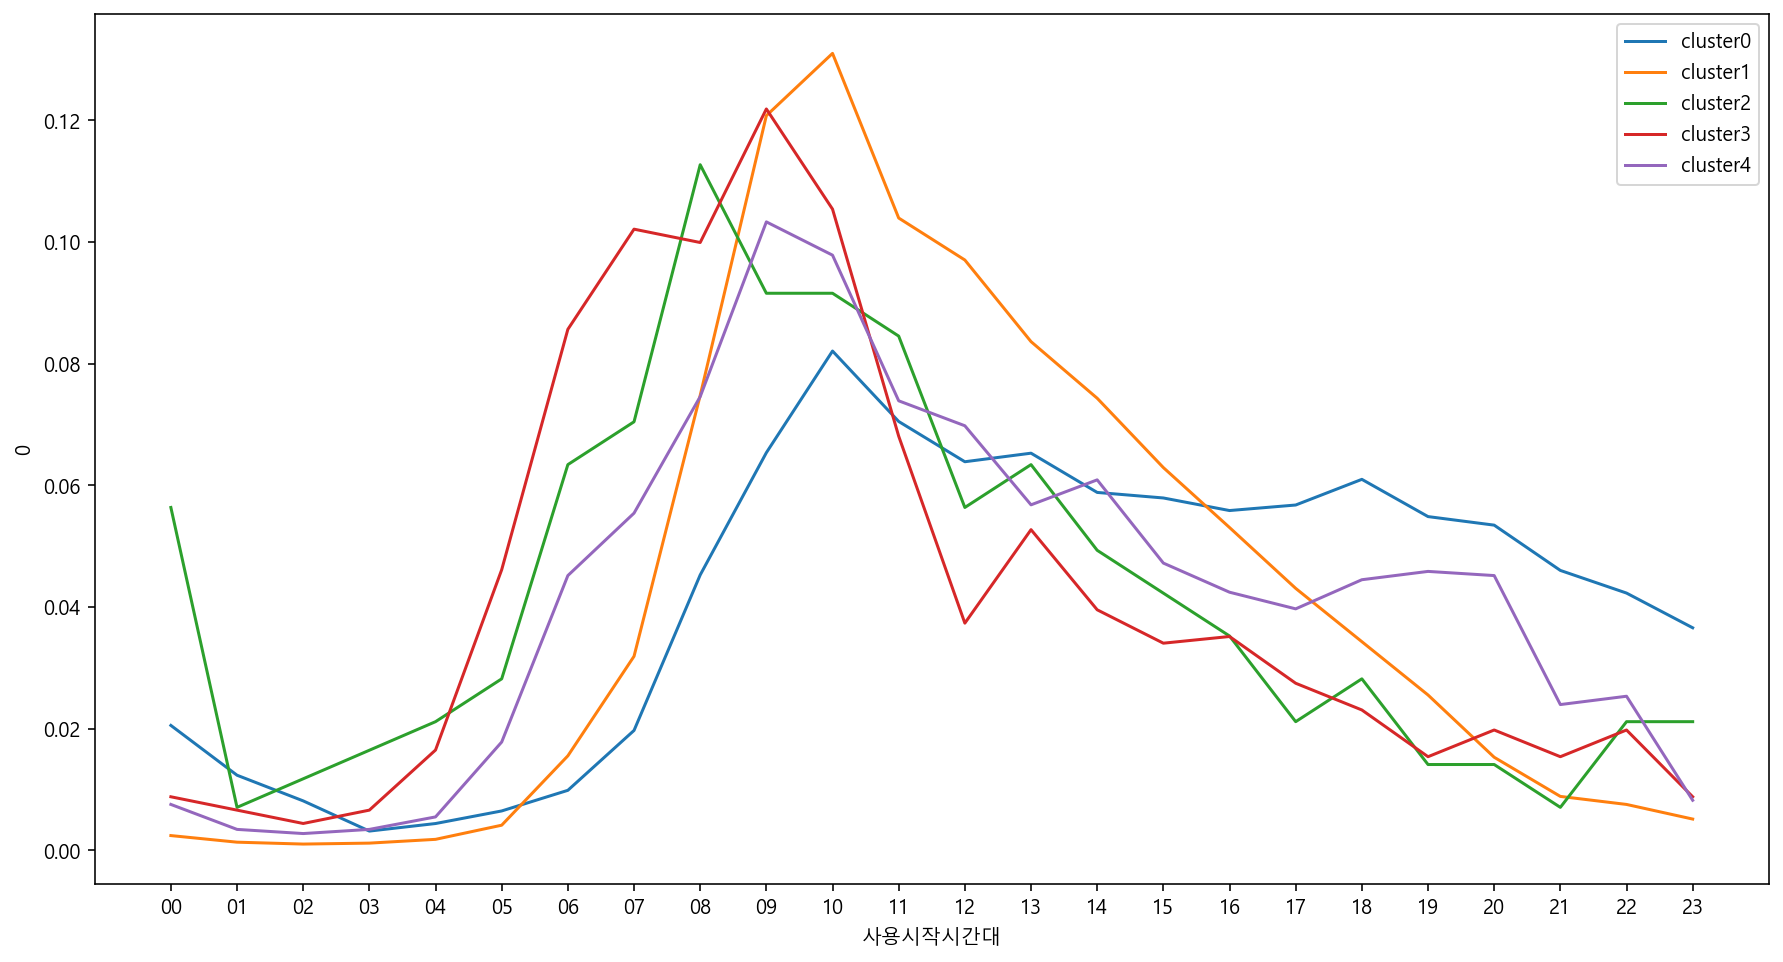

In [331]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df_시간대주말,x = '사용시작시간대', y = '0', label = 'cluster0')
sns.lineplot(data = df_시간대주말,x = '사용시작시간대', y = '1', label = 'cluster1')
sns.lineplot(data = df_시간대주말,x = '사용시작시간대', y = '2', label = 'cluster2')
sns.lineplot(data = df_시간대주말,x = '사용시작시간대', y = '3', label = 'cluster3')
sns.lineplot(data = df_시간대주말,x = '사용시작시간대', y = '4', label = 'cluster4')
plt.legend()
plt.show()

In [315]:
df_2['사용시작시간대'] = df_2['사용시작시간대'].astype('int')

In [317]:
df2_이상 = df_2.query('사용시작시간대 < 3')

In [319]:
df2_이상 

,index,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster,사용시작시간대,사용시작날짜,나이대,출퇴근시간대사용여부,사용요일_num,day,반납day
31794,37667,2017071700270,K3,41호2053,파주운정한빛6,2016.06,GRDA03,dbddl111,32,여,2016-07-21 00:00:00,2017-07-17 17:33:00,2017-07-24 00:00:00,2017-07-27 00:00:00,2017,7,24,30,2,17/07/24,0,00:00,4320.0,72.0,종료,2017-07-24 00:06:00,2017-07-27 00:00:00,5.0,150.450000,71.900000,0,119,19040,0,0.0,0.0,19040.0,0.0,사용안함,1679820.0,2016-08-14 22:00:00,2017-11-05 22:40:00,경기도 파주시 와석순환로 87 611동 2105호,2017-07-24 00:06:00.000000,-1.340727,-6.227986,14.189143,2,0,2017-07-24,30대,0,MONDAY,0,3
32754,38849,2017071900211,K3,41호2056,파주운정해솔6,2016.06,GRDA06,kmin727,31,남,2016-07-27 00:00:00,2017-07-19 17:00:00,2017-07-28 00:00:00,2017-07-31 00:00:00,2017,7,28,30,6,17/07/28,0,00:00,4320.0,72.0,종료,2017-07-28 00:38:00,2017-07-31 00:25:00,2.0,199.000000,71.783333,7860,413,73940,0,0.0,7860.0,66080.0,0.0,사용안함,4267530.0,2016-07-30 16:00:00,2018-01-07 14:00:00,경기도 파주시 목동동 해솔마을 601동 901호,2017-07-28 00:38:00.000000,4.421324,-7.185409,11.977305,2,0,2017-07-28,30대,0,FRIDAY,4,0
32943,39081,2017072700197,레이,36호8023,화성동탄새강5,2017.03,GRDA06,ko4ko4,39,남,2013-10-12 00:00:00,2017-07-27 18:14:00,2017-07-29 00:00:00,2017-08-01 00:00:00,2017,7,29,30,7,17/07/29,0,00:00,4320.0,72.0,종료,2017-07-29 01:51:00,2017-08-01 00:01:00,3.0,29.766667,70.166667,0,336,53760,0,0.0,0.0,53760.0,0.0,사용안함,6207550.0,2015-12-31 22:30:00,2018-01-02 13:20:00,경기도 화성시 반송동 동탄새강마을휴먼시아아파트 514-105,2017-07-29 01:51:00.000000,3.024254,-7.537833,12.788337,2,1,2017-07-29,30대,0,SATURDAY,5,1
33347,39593,2017071700239,K3,10호7526,화성동탄새강5,2015.08,GRDA05,luckyryu,45,남,2016-11-30 23:37:00,2017-07-17 16:46:00,2017-07-31 00:00:00,2017-08-03 00:00:00,2017,7,31,31,2,17/07/31,0,00:00,4320.0,72.0,종료,2017-07-31 00:07:00,2017-08-02 23:09:00,4.0,319.233333,71.033333,0,837,133920,0,0.0,0.0,133920.0,0.0,사용안함,1081740.0,2016-12-29 10:00:00,2017-12-23 19:20:00,"경기도 화성시 동탄중앙로 99 (반송동, 동탄새강마을휴먼시아아파트) 521동1204호",2017-07-31 00:07:00.000000,13.068387,-10.386032,9.358124,2,0,2017-07-31,40대,0,MONDAY,0,2
33988,40393,2017071700256,레이,10호8078,김포한강솔터2,2017.03,GRDA04,sunnyb75,41,여,2016-07-27 00:00,2017-07-17 17:25:00,2017-08-03 00:00:00,2017-08-05 00:00:00,2017,8,3,31,5,17/08/03,0,00:00,2880.0,48.0,종료,2017-08-03 00:02:00,2017-08-04 23:35:00,6.0,390.583333,47.550000,0,198,31680,0,0.0,0.0,31680.0,0.0,사용안함,1667300.0,2016-08-10 06:50:00,2017-12-29 06:30:00,경기도 김포시 마산동 LH솔터마을2단지아파트 201동1501호,2017-08-03 00:02:00.000000,1.364757,-4.987948,8.470736,2,0,2017-08-03,40대,0,THURSDAY,3,4
36111,43046,2017073100099,K3,29호3820,하남미사강변17,2016.06,GRDA02,shchoi,33,남,2016-12-24 17:29,2017-07-31 13:20:00,2017-08-12 00:00:00,2017-08-15 00:00:00,2017,8,12,32,7,17/08/12,0,00:00,4320.0,72.0,종료,2017-08-12 00:57:00,2017-08-14 22:46:00,2.0,274.666667,69.816667,0,367,0,0,0.0,0.0,0.0,0.0,사용안함,829310.0,2017-02-04 14:30:00,2017-09-03 10:30:00,경기도 하남시 망월동 1044 미사강변도시17단지 1709동 1909호,2017-08-12 00:57:00.000000,0.834284,-8.593539,15.140662,2,0,2017-08-12,30대,0,SATURDAY,5,0
37458,44718,2017071700281,레이,24호2174,고양삼송신원4,2017.03,GRDA05,meteor1988,28,남,2016-11-04 16:59,2017-07-17 17:44:00,2017-08-18 00:00:00,2017-08-21 00:00:00,2017,8,18,33,6,17/08/18,0,00:00,4320.0,72.0,종료,2017-08-18 00:36:00,2017-08-21 00:00:00,2.0,750.266667,71.400000,0,148,0,0,0.0,0.0,0.0,0.0,사용안함,1720800.0,2016-11-08 21:00:00,2018-01-05 00:20:00,"경기도 고양시 덕양구 신원로 60 (신원동, 신원마을4단지) 신원4단지 410동 1...",2017-08-18 00:36:00.000000,-1.928076,-6.555979,14.811194,2,0,2017-08-18,20대,0,FRIDAY,4,0
37697,44996,2017071800092,레이,66호1697,인천논현등대14,2017.03,GRDA04,esseoo,51,여,2014-06-11 00:00,2017-07-18 10:43:00,2017-08-19 00:00:00,2017-08-22 00:00:00,2017,8,19,33,7,17/08/19,0,00:00,4320.0,72.0,종료,2017-08-19 00:00:00,2017-08-22 00:00:00,3.0,757.283333,72.000000,0,0,0,0,0.0,0.0,0.0,0.0,사용안함,3532660.0,2016-01-05 17:00:00,2018-01-07 16

In [318]:
df2_이상[['예약대기시간_시','이용거리','총요금']]

,예약대기시간_시,이용거리,총요금
31794,150.450000,119,19040
32754,199.000000,413,73940
32943,29.766667,336,53760
33347,319.233333,837,133920
33988,390.583333,198,31680
36111,274.666667,367,0
37458,750.266667,148,0
37697,757.283333,0,0
37699,581.966667,256,0


<AxesSubplot:xlabel='사용시작시간대', ylabel='count'>

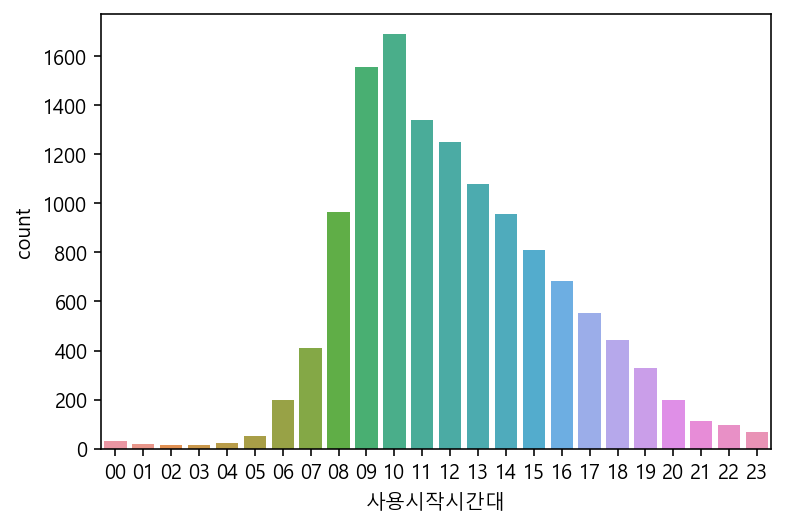

In [253]:
df_1 = df_1.sort_values(by=["사용시작시간대"], ascending=[True])
sns.countplot(data = df_1, x = '사용시작시간대')

<AxesSubplot:xlabel='사용시작시간대', ylabel='count'>

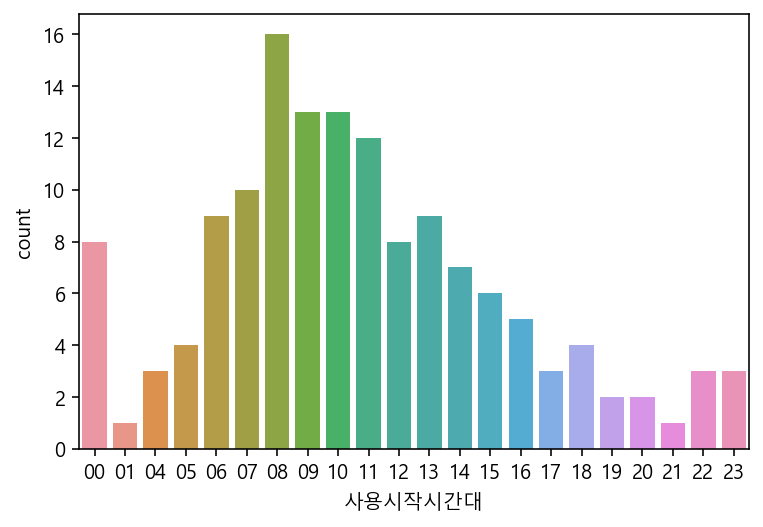

In [150]:
df_2 = df_2.sort_values(by=["사용시작시간대"], ascending=[True])
sns.countplot(data = df_2, x = '사용시작시간대')

<AxesSubplot:xlabel='사용시작시간대', ylabel='count'>

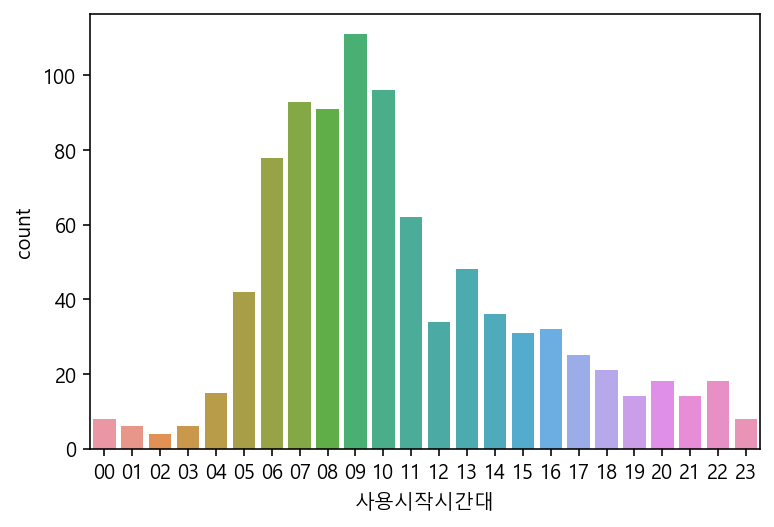

In [151]:
df_3 = df_3.sort_values(by=["사용시작시간대"], ascending=[True])
sns.countplot(data = df_3, x = '사용시작시간대')

<AxesSubplot:xlabel='사용시작시간대', ylabel='count'>

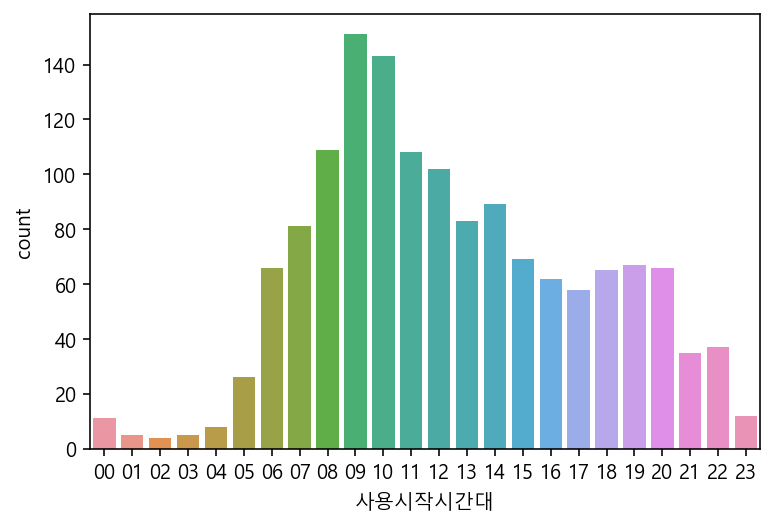

In [152]:
df_4 = df_4.sort_values(by=["사용시작시간대"], ascending=[True])
sns.countplot(data = df_4, x = '사용시작시간대')

In [153]:
df_0

,index,예약번호,차종,차량번호,대여존,차량연식,등급,아이디,연령,성별,가입일시,예약일시,예약시작,예약종료,Year,Month,Day,Week,Date,시작일,시작시,시작시분,예약분,예약시간_시,예약상태,사용시작,사용종료,종료요일,예약대기시간_시,이용시간_시,시간요금,이용거리,총요금,예약요금,연장요금,반납지연요금,거리요금,취소패널티,쿠폰,누적이용금액,최초탑승일시,최근탑승일시,ADDR,사용시작_,Factor1,Factor2,Factor3,k_means_cluster,사용시작시간대,사용시작날짜,나이대
65369,78121,2017122600001,모닝,10호7872,김포초당1,2016.10,GRDA03,toobiki,29,남,2016-12-18 23:55,2017-12-26 00:12:00,2017-12-26 00:20:00,2017-12-26 00:50:00,2017,12,26,52,3,17/12/26,0,00:20,30.0,0.500000,종료,2017-12-26 00:15:00,2017-12-26 00:48:00,3.0,0.133333,0.550000,1770,4,2410,1770,0.0,0.0,640.0,0.0,사용안함,170850.0,2016-12-19 03:20:00,2018-01-07 18:50:00,경기도 김포시 장기동 1598 초당마을주공아파트 109-705,2017-12-26 00:15:00.000000,-0.308382,-0.631016,-0.197898,0,00,2017-12-26,20대
9369,11092,2017031700123,모닝,36하1407,남양주진접17,2016.10,GRDA05,kst3090,42,남,2015-10-19 00:00:00,2017-03-17 21:17:00,2017-03-17 23:50:00,2017-03-18 03:00:00,2017,3,17,11,6,17/03/17,23,23:50,190.0,3.166667,종료,2017-03-18 00:33:00,2017-03-18 03:00:00,7.0,2.550000,2.450000,15580,38,21280,15580,0.0,0.0,5700.0,0.0,사용안함,3094090.0,2016-01-05 15:00:00,2018-01-08 12:30:00,경기도 남양주시 진접읍 휴먼시아17단지아파트 1715동 706호,2017-03-18 00:33:00.000000,-0.002673,0.316918,-0.259385,0,00,2017-03-18,40대
61472,73419,2017120700002,모닝,41호2107,고양삼송원흥11(행복주택),2017.01,GRDA03,sjoo89,28,남,2017-03-05 21:10,2017-12-07 00:10:00,2017-12-07 00:10:00,2017-12-07 00:50:00,2017,12,7,49,5,17/12/07,0,00:10,40.0,0.666667,종료,2017-12-07 00:11:00,2017-12-07 00:57:00,5.0,0.000000,0.766667,2360,40,8760,2360,0.0,0.0,6400.0,0.0,사용안함,212940.0,2017-03-05 23:50:00,2018-01-01 02:40:00,"경기도 고양시 덕양구 원흥1로 25 (원흥동, 고양삼송엘에이치원흥마을11단지) 11...",2017-12-07 00:11:00.000000,0.393206,-0.796259,-0.417549,0,00,2017-12-07,20대
30802,36426,2017071900332,레이,66호1687,인천영종1,2017.03,GRDA03,khs1206,26,남,2017-06-27 01:41:00,2017-07-19 23:18:00,2017-07-20 00:00:00,2017-07-20 06:00:00,2017,7,20,29,5,17/07/20,0,00:00,360.0,6.000000,종료,2017-07-20 00:12:00,2017-07-20 05:31:00,5.0,0.700000,5.316667,5000,15,7400,5000,0.0,0.0,2400.0,0.0,심야 이용권,169740.0,2017-06-28 01:20:00,2017-12-22 11:30:00,인천광역시 중구 운서동 3103-9 영종1단지엘에이치 145-203,2017-07-20 00:12:00.000000,-0.389089,-0.758027,0.791482,0,00,2017-07-20,20대
30803,36427,2017072000004,모닝,36하1411,하남미사강변17,2016.12,GRDA02,hyoj89130,28,여,2017-04-26 11:41:00,2017-07-20 00:05:00,2017-07-20 00:20:00,2017-07-20 06:00:00,2017,7,20,29,5,17/07/20,0,00:20,340.0,5.666667,종료,2017-07-20 00:17:00,2017-07-20 01:57:00,5.0,0.250000,1.666667,5000,28,9200,5000,0.0,0.0,4200.0,0.0,심야 이용권,220060.0,2017-06-14 12:00:00,2017-08-01 00:40:00,"서울특별시 강동구 고덕로97길 100 (강일동, 강일리버파크11단지) 1101동 907호",2017-07-20 00:17:00.000000,-0.069536,-0.827287,0.613836,0,00,2017-07-20,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36500,43528,2017081200222,모닝,29호3881,서울수서,2016.10,GRDA02,zangki,31,남,2013-12-01 00:00,2017-08-12 22:17:00,2017-08-13 23:00:00,2017-08-14 04:00:00,2017,8,13,32,1,17/08/13,23,23:00,300.0,5.000000,종료,2017-08-13 23:02:00,2017-08-14 04:00:00,2.0,24.716667,4.966667,17100,67,27150,17100,0.0,0.0,10050.0,0.0,사용안함,579331.0,2016-01-02 09:00:00,2017-10-04 12:00:00,서울특별시 강남구 수서동 주공아파트 110-1403,2017-08-13 23:02:00.000000,0.450898,0.165643,-0.097736,0,23,2017-08-13,30대
36113,43049,2017081100284,레이,36하1425,구리갈매1,2017.03,GRDA02,jakiaro,34,남,2017-06-05 23:21,2017-08-11 23:56:00,2017-08-12 00:00:00,2017-08-12 02:30:00,2017,8,12,32,7,17/08/12,0,00:00,150.0,2.500000,종료,2017-08-11 23:59:00,2017-08-12 01:04:00,7.0,0.066667,1.083333,0,13,2080,0,0.0,0.0,2080.0,0.0,시간할인 주중/주말(휴일포함) 180분 권,7830.0,2017-08-12 00:00:00,2017-10-20 16:00:00,"경기도 구리시 갈매순환로 143 (갈매동, LH갈매1단지) 108동 1105호",2017-08-11 23:59:00.000000,-0.166127,-0.993996,0.203637,0,23,2017-08-11,30대
35851,42720,2017081000017,K3,29호3818,고양삼송신원3,2016.06,GRDA04,hcjstudio,29,남,2017-07-05 07:03,2017-08-10 05:45:00,2017-08-10 22:00:00,2017-08-11 07:00:00,2017,8,10,32,5,17/08/10,22,22:00,540

In [212]:
df['출퇴근시간대사용여부'] = df['사용시작시간대'].apply(lambda x : 1 if (x == '08')|(x == '09')|(x == '10')|(x == '17')|(x == '18')|(x == '19') else 0)
df['day'] = df['사용시작'].astype('datetime64').dt.weekday
df['반납day'] = df['사용종료'].astype('datetime64').dt.weekday

In [213]:
df['출퇴근시간대사용여부'].value_counts(normalize = True)

0    0.59125
1    0.40875
Name: 출퇴근시간대사용여부, dtype: float64

In [332]:
df_0 = df.query('k_means_cluster == 0')
df_1 = df.query('k_means_cluster == 1')
df_2 = df.query('k_means_cluster == 2')
df_3 = df.query('k_means_cluster == 3')
df_4 = df.query('k_means_cluster == 4')

In [333]:
df_0['day'].value_counts(normalize = True)

0    0.160437
1    0.156420
3    0.155829
2    0.154934
4    0.142177
6    0.117519
5    0.112683
Name: day, dtype: float64

In [334]:
df_00 = df_0.groupby('day')['예약번호'].count().reset_index()

<AxesSubplot:xlabel='day', ylabel='count'>

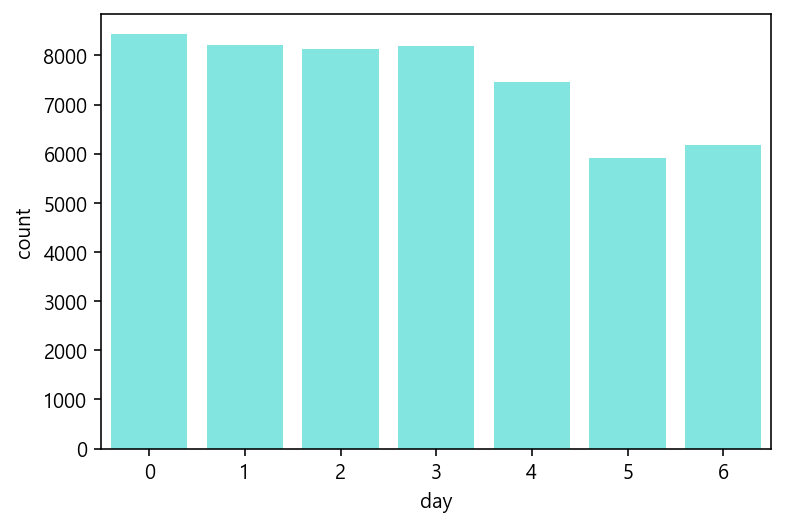

In [336]:
sns.countplot(data = df_0, x = 'day', color = '#72F5ED')

In [337]:
df_1['day'].value_counts(normalize = True)

5    0.231718
6    0.218534
4    0.141528
0    0.105157
2    0.103063
3    0.101978
1    0.098022
Name: day, dtype: float64

<AxesSubplot:xlabel='day', ylabel='count'>

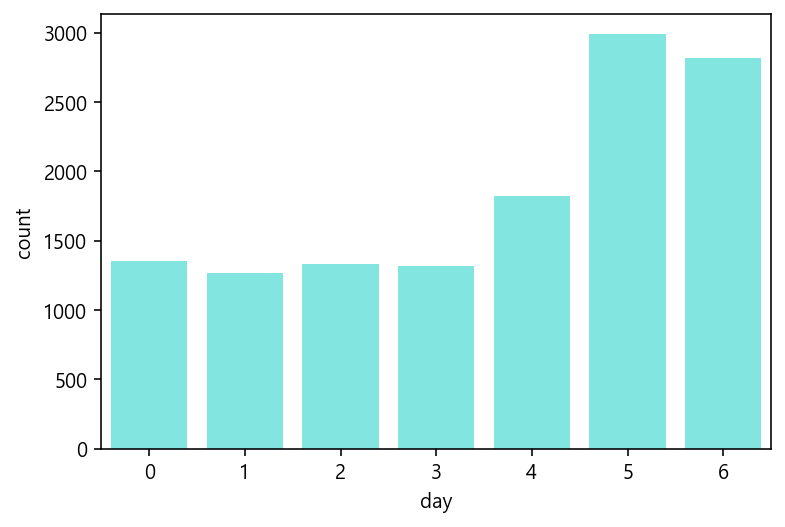

In [338]:
sns.countplot(data = df_1, x = 'day', color = '#72F5ED')

In [339]:
df_2['day'].value_counts(normalize = True)

0    0.253521
4    0.197183
5    0.161972
1    0.119718
3    0.119718
6    0.084507
2    0.063380
Name: day, dtype: float64

<AxesSubplot:xlabel='day', ylabel='count'>

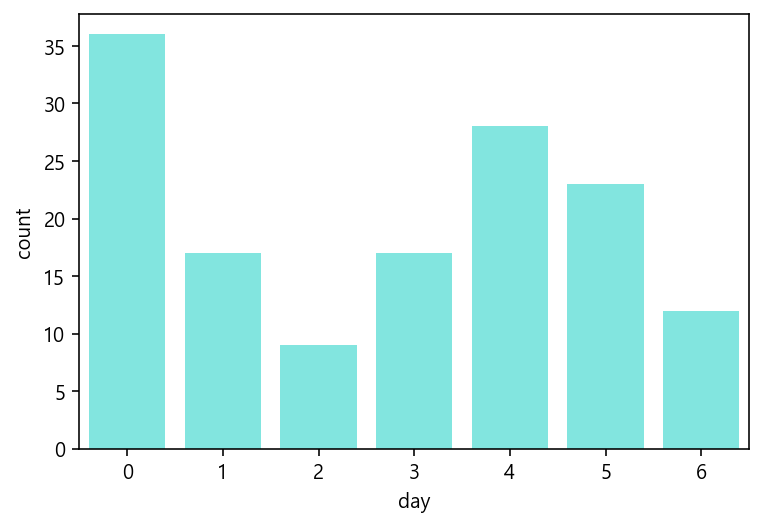

In [340]:
sns.countplot(data = df_2, x = 'day', color = '#72F5ED')

In [341]:
df_3['day'].value_counts(normalize = True)

5    0.201976
0    0.138310
6    0.135016
1    0.135016
4    0.130626
3    0.130626
2    0.128430
Name: day, dtype: float64

<AxesSubplot:xlabel='day', ylabel='count'>

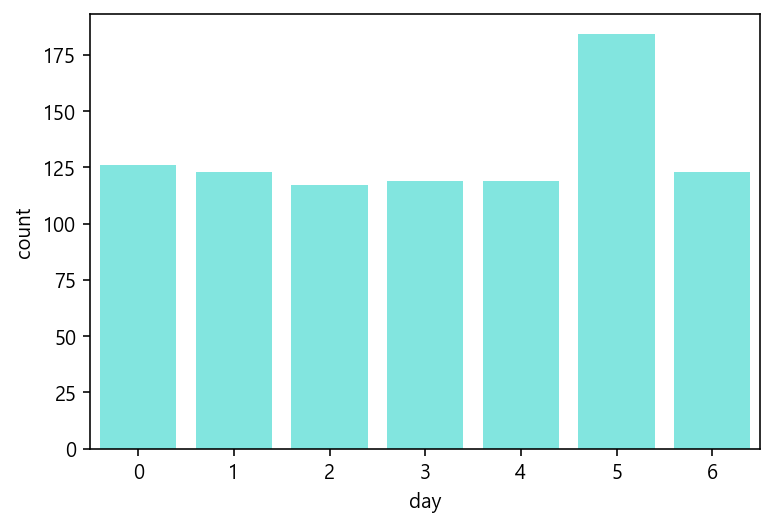

In [342]:
sns.countplot(data = df_3, x = 'day', color = '#72F5ED')

In [343]:
df_4['day'].value_counts(normalize = True)

5    0.240082
4    0.166895
0    0.127907
3    0.127907
1    0.121067
2    0.119699
6    0.096443
Name: day, dtype: float64

<AxesSubplot:xlabel='day', ylabel='count'>

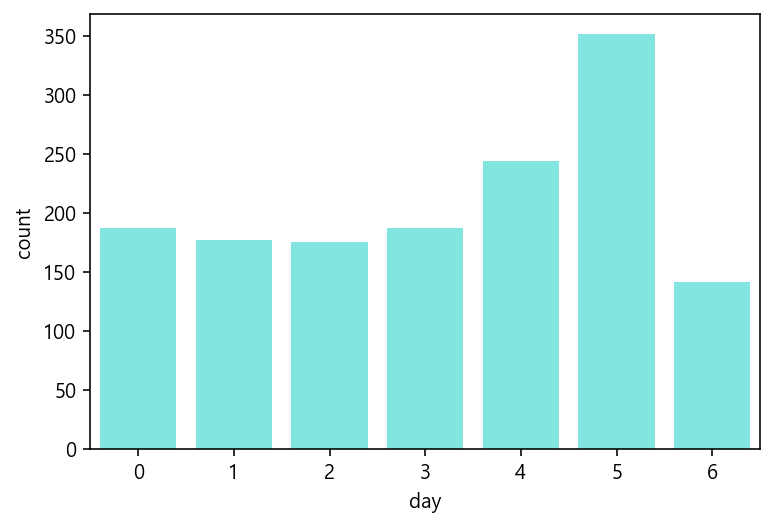

In [344]:
sns.countplot(data = df_4, x = 'day', color = '#72F5ED')

<AxesSubplot:xlabel='반납day', ylabel='count'>

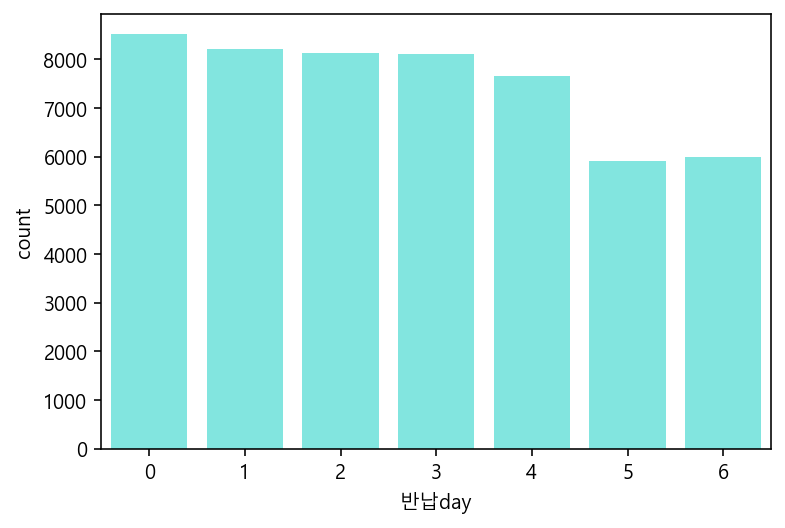

In [346]:
sns.countplot(data = df_0, x = '반납day', color = '#72F5ED')

<AxesSubplot:xlabel='반납day', ylabel='count'>

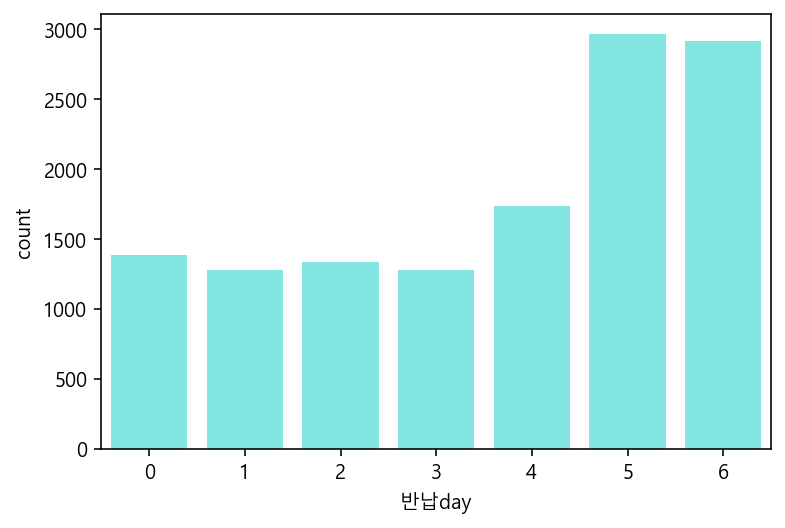

In [347]:
sns.countplot(data = df_1, x = '반납day', color = '#72F5ED')

<AxesSubplot:xlabel='반납day', ylabel='count'>

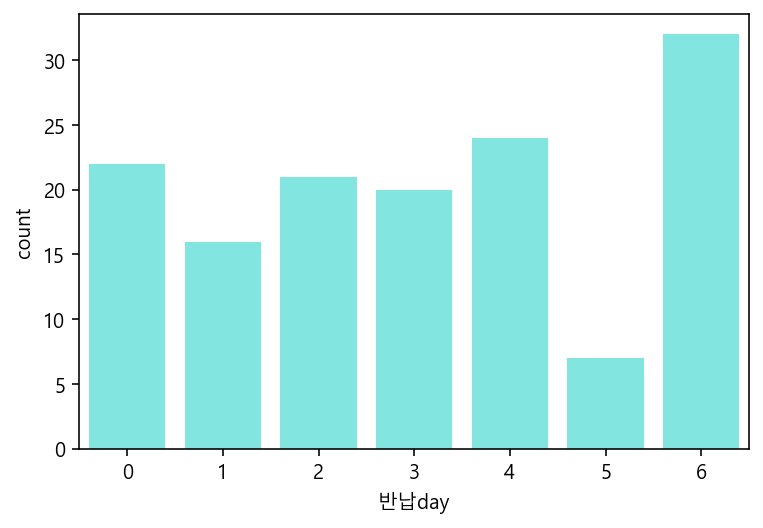

In [348]:
sns.countplot(data = df_2, x = '반납day', color = '#72F5ED')

<AxesSubplot:xlabel='반납day', ylabel='count'>

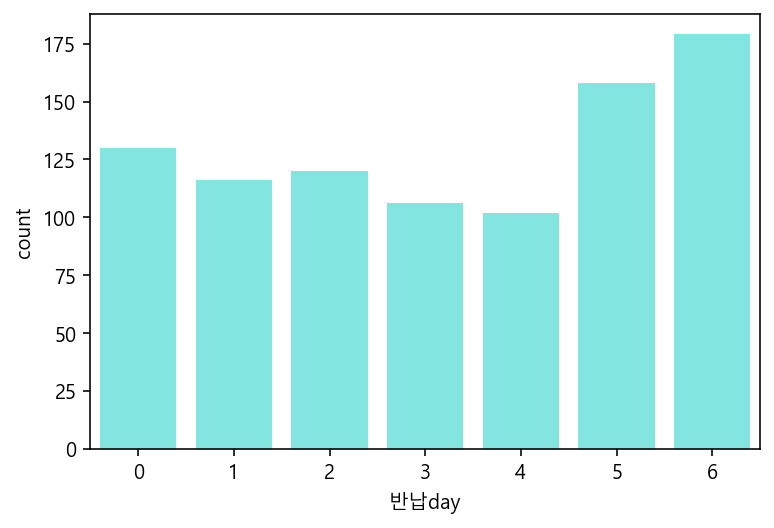

In [349]:
sns.countplot(data = df_3, x = '반납day', color = '#72F5ED')

<AxesSubplot:xlabel='반납day', ylabel='count'>

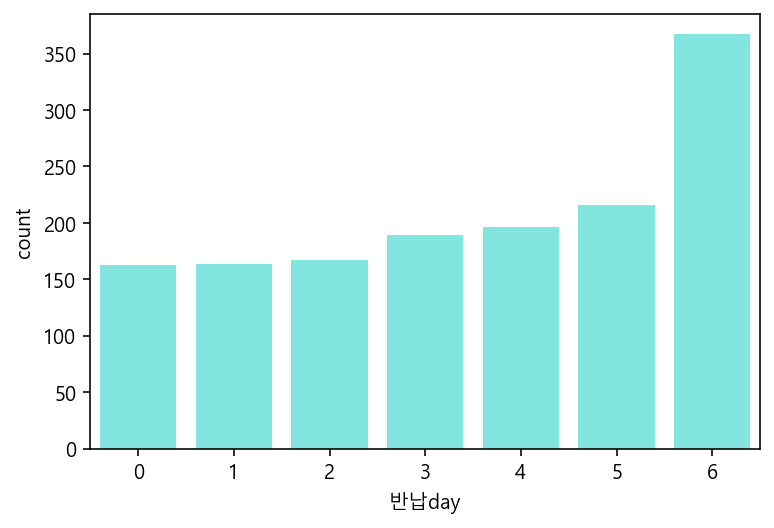

In [350]:
sns.countplot(data = df_4, x = '반납day', color = '#72F5ED')

In [235]:
df_이용거리 = df.groupby('k_means_cluster')[['이용거리']].mean().round(2);df_이용거리

,이용거리
k_means_cluster,
0,21.32
1,60.28
2,346.96
3,415.93
4,141.48


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

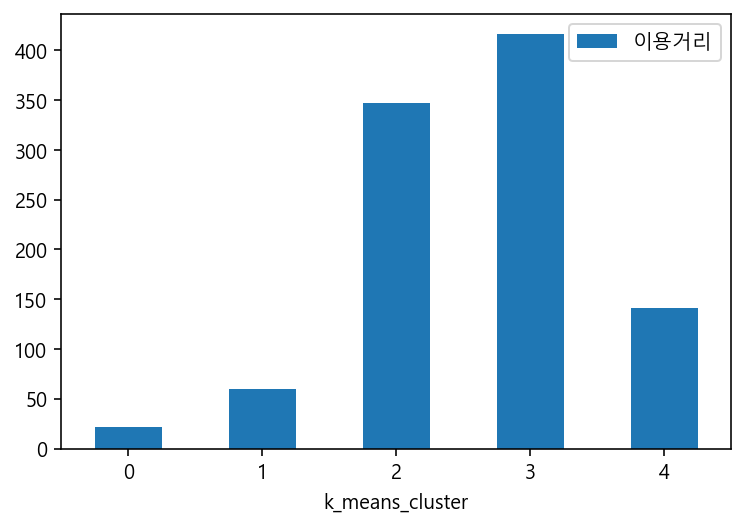

In [363]:
df_이용거리.plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

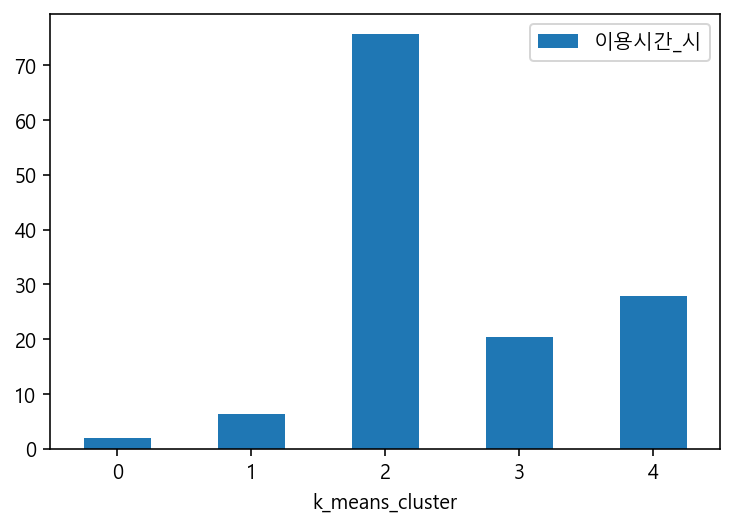

In [364]:
df_이용시간 = df.groupby('k_means_cluster')[['이용시간_시']].mean().round(2)
df_이용시간.plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

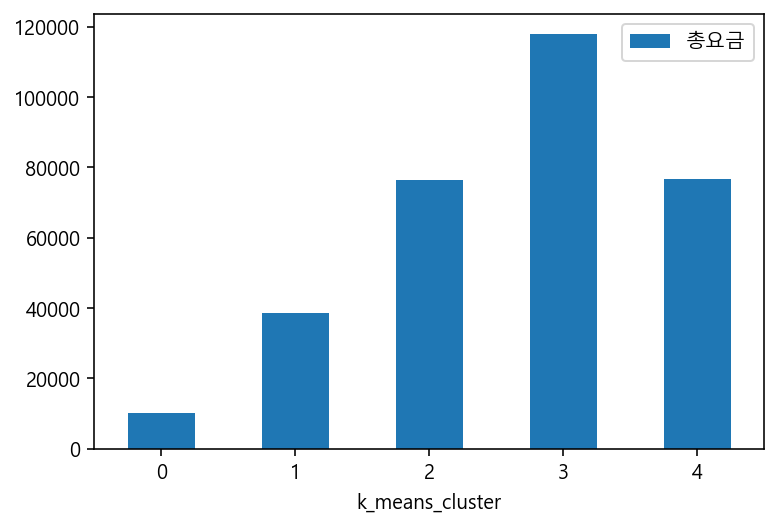

In [365]:
df_총요금 = df.groupby('k_means_cluster')[['총요금']].mean().round(2)
df_총요금.plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

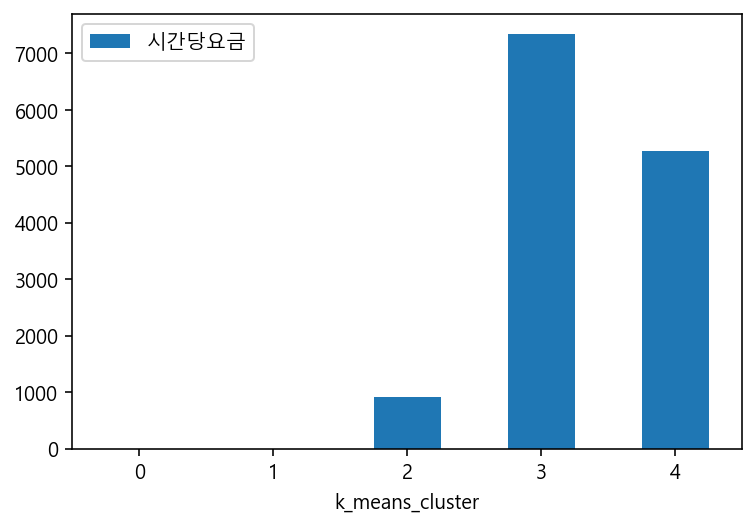

In [366]:
df['시간당요금'] = df['총요금'] / df['이용시간_시']
df_시간당요금 = df.groupby('k_means_cluster')[['시간당요금']].mean().round(2)
df_시간당요금.plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

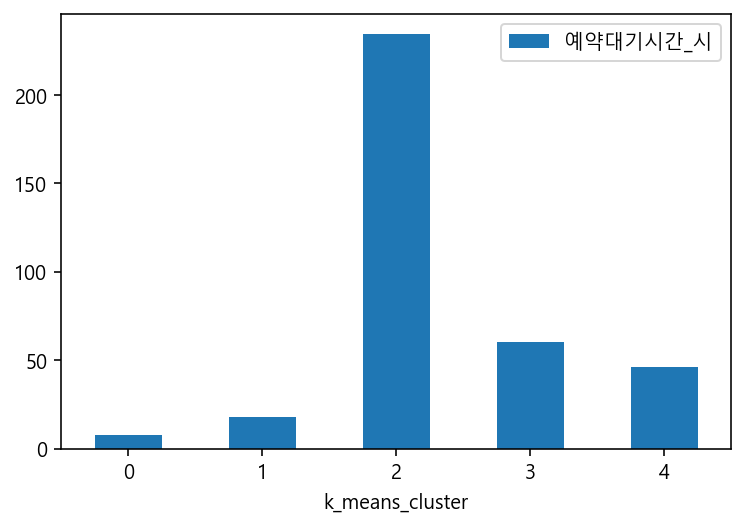

In [367]:
df_예약대기시간 = df.groupby('k_means_cluster')[['예약대기시간_시']].mean().round(2)
df_예약대기시간.plot.bar()
plt.xticks(rotation=0)